In [20]:
import pandas as pd
import statistics
import plotly.tools
import scipy.special
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import mysql.connector
import pandas.io.sql as sqlio
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statistics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import plotly.express as px
from matplotlib import font_manager
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GroupKFold
my_font = str(font_manager.FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'))
import pandas as pd
import statistics

import plotly.tools
import scipy.special
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import mysql.connector
import pandas.io.sql as sqlio
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statistics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import plotly.express as px
from matplotlib import font_manager
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GroupKFold
my_font = str(font_manager.FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'))


# Data Preprocessing

In [21]:
# Connect to mysql database
cnx = mysql.connector.connect(user='root', password='Kh18riku!',
                                host='127.0.0.1',
                                database='global_n2o')
cursor = cnx.cursor()

query = ("SELECT * FROM RawClassificationTreatment")
# Execute the query and fetch all results
alldata = pd.read_sql(query, cnx)
cnx.close()

# Exclude ExperimentID 38 (no hot moments)
alldata = alldata[alldata['ExperimentID'] != 38]

         
print(alldata.head())

/tmp/ipykernel_5546/1276002.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



   RawID  PubID  ExperimentID  TreatmentID        Date  DOY   N2OFlux  \
0      1      1             1            2  2006-06-19  170  -9.69777   
1      2      1             1            2  2006-06-20  171  43.61360   
2      3      1             1            2  2006-06-21  172  -4.27172   
3      4      1             1            2  2006-06-22  173  53.78540   
4      5      1             1            2  2006-06-23  174  23.54990   

   FluxStandardError  HMTruth  HMMCD  ... SandMean  SiltMean  ClayMean  \
0                NaN      0.0    0.0  ...     26.0      52.0      22.0   
1                NaN      0.0    0.0  ...     26.0      52.0      22.0   
2                NaN      0.0    0.0  ...     26.0      52.0      22.0   
3                NaN      0.0    0.0  ...     26.0      52.0      22.0   
4                NaN      0.0    0.0  ...     26.0      52.0      22.0   

   Gracenet  MAP  MAT  Latitude  Longitude  \
0         0  0.0  0.0   42.4261   -76.2267   
1         0  0.0  0.0   

In [22]:
# Merge the columns VWC and VWCcalculated
# print the count of WFPS
print(alldata.count())
alldata['VWC'].fillna(alldata['VWCcalculated'], inplace=True)
alldata['WFPS'].fillna(alldata['WFPScalculated'], inplace=True)
# Drop the calculated columns
alldata = alldata.drop('VWCcalculated', axis=1)
alldata = alldata.drop('WFPScalculated', axis=1)
# If VWC > 1, divide by 100
alldata['VWC'] = alldata['VWC'].apply(lambda x: x / 100 if x > 1 else x)
print(alldata.count())


RawID                207572
PubID                207572
ExperimentID         207572
TreatmentID          207572
Date                 207572
DOY                  207572
N2OFlux               23048
FluxStandardError      9280
HMTruth              149196
HMMCD                203843
HMMAD                207572
HMKNN                 22576
HMIQR                 23030
VWC                   15025
VWCcalculated           830
WFPS                   2348
WFPScalculated         7868
SoilT                 18045
AirT                  19833
Precip               200531
NitrogenApplied      206693
NitrogenType         207572
AirTMax              160847
AirTMin              160557
PrimaryCrop          207572
Management           207572
SandMean             207572
SiltMean             207572
ClayMean             207572
Gracenet             207572
MAP                  207572
MAT                  207572
Latitude             207572
Longitude            207572
PubTitle             207572
Citation            

/tmp/ipykernel_5546/2083270441.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_5546/2083270441.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

RawID                207572
PubID                207572
ExperimentID         207572
TreatmentID          207572
Date                 207572
DOY                  207572
N2OFlux               23048
FluxStandardError      9280
HMTruth              149196
HMMCD                203843
HMMAD                207572
HMKNN                 22576
HMIQR                 23030
VWC                   15855
WFPS                  10216
SoilT                 18045
AirT                  19833
Precip               200531
NitrogenApplied      206693
NitrogenType         207572
AirTMax              160847
AirTMin              160557
PrimaryCrop          207572
Management           207572
SandMean             207572
SiltMean             207572
ClayMean             207572
Gracenet             207572
MAP                  207572
MAT                  207572
Latitude             207572
Longitude            207572
PubTitle             207572
Citation             207572
dtype: int64


In [23]:
# Linear Interpolate the VWC and SoilT and AirT columns for each TreatmentID as long as measurement
# gaps are less than 14 days. If the measurement gap is greater than 14 days, then set VWC and
# SoilT to None
import math
alldata['VWC'] = alldata['VWC'].astype(float)
alldata['SoilT'] = alldata['SoilT'].astype(float)
alldata['AirT'] = alldata['AirT'].astype(float)
alldata['WFPS'] = alldata['WFPS'].astype(float)
# Create separate interpolated columns for VWC, SoilT, and AirT
alldata['VWC_interpolated'] = alldata['VWC']
alldata['SoilT_interpolated'] = alldata['SoilT']
alldata['AirT_interpolated'] = alldata['AirT']
alldata['WFPS_interpolated'] = alldata['WFPS']
alldata['VWC_days_since_last_measurement'] = None
alldata['VWC_days_until_next_measurement'] = None


# Iterate through each TreatmentID and interpolate the VWC, SoilT, and AirT columns
for treatment in alldata['TreatmentID'].unique():
    treatment_df = alldata[alldata['TreatmentID'] == treatment]
    treatment_df['VWC_interpolated'] = treatment_df['VWC_interpolated'].interpolate(limit_direction='both', limit=7, limit_area='inside')
    treatment_df['SoilT_interpolated'] = treatment_df['SoilT_interpolated'].interpolate(limit_direction='both', limit=7, limit_area='inside')
    treatment_df['AirT_interpolated'] = treatment_df['AirT_interpolated'].interpolate(limit_direction='both', limit=7, limit_area='inside')
    treatment_df['WFPS_interpolated'] = treatment_df['WFPS_interpolated'].interpolate(limit_direction='both', limit=7, limit_area='inside')
    # Iterate through each row and calculate the number of days since the last row where VWC was not None
    i = 0
    for index, row in treatment_df.iterrows():
        # If vwc is nan, set it to None
        if row['VWC'] == '' or row['VWC'] == None or math.isnan(row['VWC']):
            i += 1
            treatment_df.at[index, 'VWC_days_since_last_measurement'] = i
        else:
            i = 0
            treatment_df.at[index, 'VWC_days_since_last_measurement'] = i
    
    # Iterate through each row and calculate the number of days until the next row where VWC was not None
    i = 0
    # Start by iterating through rows in reverse
    # reverse the rows of the treatment_df
    treatment_df = treatment_df.iloc[::-1]
    for index, row in treatment_df.iterrows():
        if row['VWC'] == '' or row['VWC'] == None or math.isnan(row['VWC']):
            i += 1
            treatment_df.at[index, 'VWC_days_until_next_measurement'] = i
        else:
            i = 0
            treatment_df.at[index, 'VWC_days_until_next_measurement'] = i
    
    # reverse the rows of the treatment_df
    treatment_df = treatment_df.iloc[::-1]
    alldata[alldata['TreatmentID'] == treatment] = treatment_df

alldata['VWC'] = alldata['VWC_interpolated']
alldata['WFPS'] = alldata['WFPS_interpolated']
alldata['SoilT'] = alldata['SoilT_interpolated']
alldata['AirT'] = alldata['AirT_interpolated']
alldata['VWC_days_since_last_measurement'] = alldata['VWC_days_since_last_measurement'].astype(int)
alldata['VWC_days_until_next_measurement'] = alldata['VWC_days_until_next_measurement'].astype(int)
alldata = alldata.drop('VWC_interpolated', axis=1)
alldata = alldata.drop('WFPS_interpolated', axis=1)
alldata = alldata.drop('SoilT_interpolated', axis=1)
alldata = alldata.drop('AirT_interpolated', axis=1)

print(alldata.count())
# Save to csv
alldata.to_csv('alldata_tracker.csv', index=False)


/tmp/ipykernel_5546/245788343.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5546/245788343.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5546/245788343.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5546

RawID                              207572
PubID                              207572
ExperimentID                       207572
TreatmentID                        207572
Date                               207572
DOY                                207572
N2OFlux                             23048
FluxStandardError                    9280
HMTruth                            149196
HMMCD                              203843
HMMAD                              207572
HMKNN                               22576
HMIQR                               23030
VWC                                 95648
WFPS                                54083
SoilT                              104139
AirT                                76977
Precip                             200531
NitrogenApplied                    206693
NitrogenType                       207572
AirTMax                            160847
AirTMin                            160557
PrimaryCrop                        207572
Management                        

In [24]:
experiments = pd.unique(alldata.TreatmentID)
alldata['days_since_precip'] = 0
alldata['last_precip'] = None
days_since_p_list = []
last_p_list = []
for experiment in experiments:
    expdf = alldata.query('TreatmentID == @experiment')
    first_flag = 1
    print(experiment)
    for index, row in expdf.iterrows():
        if row['Precip'] > 0:
            expdf.loc[index, "days_since_precip"] = 0
            expdf.loc[index, "last_precip"] = row['Precip']
            last_precip = row['Precip']
        elif first_flag == 1:
            expdf.loc[index, "days_since_precip"] = None
        elif past_days == None:
            expdf.loc[index, "days_since_precip"] = None
        elif row.Precip == 0:
            expdf.loc[index, "days_since_precip"] = past_days + 1
            expdf.loc[index, "last_precip"] = last_precip
        past_days = expdf.loc[index, "days_since_precip"]
        first_flag = 0  
    days_since_p_list.extend(list(expdf.days_since_precip))
    last_p_list.extend(list(expdf.last_precip))
alldata['days_since_precip'] = days_since_p_list
alldata['last_precip'] = last_p_list

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
137
138
139
140
141
142
143
144
145
146
147
149
150
151
152
153
154
155
156
157
158
159
160
161
162
164
166
167
169
170
171
180
181
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
270
273
276
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
302
303
305
306
307
308
309
310
311
312
313
314
315
316
317
330
331
332
318
319
333
334
320
321
322
323
324
325
326
327
328
329


In [25]:
print(alldata.head())

   RawID  PubID  ExperimentID  TreatmentID        Date  DOY   N2OFlux  \
0      1      1             1            2  2006-06-19  170  -9.69777   
1      2      1             1            2  2006-06-20  171  43.61360   
2      3      1             1            2  2006-06-21  172  -4.27172   
3      4      1             1            2  2006-06-22  173  53.78540   
4      5      1             1            2  2006-06-23  174  23.54990   

   FluxStandardError  HMTruth  HMMCD  ...  MAP  MAT  Latitude  Longitude  \
0                NaN      0.0    0.0  ...  0.0  0.0   42.4261   -76.2267   
1                NaN      0.0    0.0  ...  0.0  0.0   42.4261   -76.2267   
2                NaN      0.0    0.0  ...  0.0  0.0   42.4261   -76.2267   
3                NaN      0.0    0.0  ...  0.0  0.0   42.4261   -76.2267   
4                NaN      0.0    0.0  ...  0.0  0.0   42.4261   -76.2267   

                                            PubTitle  \
0  Temporal variability of nitrous oxide from fe

In [26]:
experiments = pd.unique(alldata.TreatmentID)
alldata['days_since_fert'] = 0
alldata['last_fert'] = None
alldata['last_fert_type'] = None
days_since_f_list = []
last_f_list = []
last_type_list = []
for experiment in experiments:
    expdf = alldata.query('TreatmentID == @experiment')
    first_flag = 1
    print(experiment)
    for index, row in expdf.iterrows():
        if row['NitrogenApplied'] > 0:
            expdf.loc[index, "days_since_fert"] = 0
            expdf.loc[index, "last_fert"] = row['NitrogenApplied']
            expdf.loc[index, "last_fert_type"] = row['NitrogenType']
            last_fert = row['NitrogenApplied']
            last_fert_type = row['NitrogenType']
        elif first_flag == 1:
            expdf.loc[index, "days_since_fert"] = None
        elif past_days == None:
            expdf.loc[index, "days_since_fert"] = None
        elif row.NitrogenApplied == 0:
            expdf.loc[index, "days_since_fert"] = past_days + 1
            expdf.loc[index, "last_fert"] = last_fert
            expdf.loc[index, "last_fert_type"] = last_fert_type
            
        past_days = expdf.loc[index, "days_since_fert"]
        first_flag = 0  
    days_since_f_list.extend(list(expdf.days_since_fert))
    last_f_list.extend(list(expdf.last_fert))
    last_type_list.extend(list(expdf.last_fert_type))
alldata['days_since_fert'] = days_since_f_list
alldata['last_fert'] = last_f_list
alldata['last_fert_type'] = last_type_list

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
137
138
139
140
141
142
143
144
145
146
147
149
150
151
152
153
154
155
156
157
158
159
160
161
162
164
166
167
169
170
171
180
181
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
270
273
276
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
302
303
305
306
307
308
309
310
311
312
313
314
315
316
317
330
331
332
318
319
333
334
320
321
322
323
324
325
326
327
328
329


In [27]:
experiments = pd.unique(alldata.TreatmentID)
alldata['airT_dm1'] = None
alldata['airT_dm2'] = None
alldata['airT_dm3'] = None
alldata['airT_dm4'] = None
alldata['airT_dm5'] = None
alldata['airT_dm6'] = None
alldata['airT_dm7'] = None
alldata['vwc_dm1'] = None
alldata['vwc_dm2'] = None
alldata['vwc_dm3'] = None
alldata['vwc_dm4'] = None
alldata['vwc_dm5'] = None
alldata['vwc_dm6'] = None
alldata['vwc_dm7'] = None
alldata['wfps_dm1'] = None
alldata['wfps_dm2'] = None
alldata['wfps_dm3'] = None
alldata['wfps_dm4'] = None
alldata['wfps_dm5'] = None
alldata['wfps_dm6'] = None
alldata['wfps_dm7'] = None
alldata['precip_dm1'] = None
alldata['precip_dm2'] = None
alldata['precip_dm3'] = None
alldata['precip_dm4'] = None
alldata['precip_dm5'] = None
alldata['precip_dm6'] = None
alldata['precip_dm7'] = None
alldata['soilT_dm1'] = None
alldata['soilT_dm2'] = None
alldata['soilT_dm3'] = None
alldata['soilT_dm4'] = None
alldata['soilT_dm5'] = None
alldata['soilT_dm6'] = None
alldata['soilT_dm7'] = None

airt1 = []
airt2 = []
airt3 = []
airt4 = []
airt5 = []
airt6 = []
airt7 = []
vwc1 = []
vwc2 = []
vwc3 = []
vwc4 = []
vwc5 = []
vwc6 = []
vwc7 = []
wfps1 = []
wfps2 = []
wfps3 = []
wfps4 = []
wfps5 = []
wfps6 = []
wfps7 = []
precip1 = []
precip2 = []
precip3 = []
precip4 = []
precip5 = []
precip6 = []
precip7 = []
soilt1 = []
soilt2 = []
soilt3 = []
soilt4 = []
soilt5 = []
soilt6 = []
soilt7 = []

for experiment in experiments:
    expdf = alldata.query('TreatmentID == @experiment')
    expdf.reset_index(drop=True, inplace=True)
    day_count = 1
    for index, row in expdf.iterrows():
        if day_count < 8:
            day_count += 1
            continue
        expdf.loc[index, "airT_dm1"] = expdf.loc[index - 1, "AirT"]
        expdf.loc[index, "airT_dm2"] = expdf.loc[index - 2, "AirT"]
        expdf.loc[index, "airT_dm3"] = expdf.loc[index - 3, "AirT"]
        expdf.loc[index, "airT_dm4"] = expdf.loc[index - 4, "AirT"]
        expdf.loc[index, "airT_dm5"] = expdf.loc[index - 5, "AirT"]
        expdf.loc[index, "airT_dm6"] = expdf.loc[index - 6, "AirT"]
        expdf.loc[index, "airT_dm7"] = expdf.loc[index - 7, "AirT"]
        
        expdf.loc[index, "vwc_dm1"] = expdf.loc[index - 1, "VWC"]
        expdf.loc[index, "vwc_dm2"] = expdf.loc[index - 2, "VWC"]
        expdf.loc[index, "vwc_dm3"] = expdf.loc[index - 3, "VWC"]
        expdf.loc[index, "vwc_dm4"] = expdf.loc[index - 4, "VWC"]
        expdf.loc[index, "vwc_dm5"] = expdf.loc[index - 5, "VWC"]
        expdf.loc[index, "vwc_dm6"] = expdf.loc[index - 6, "VWC"]
        expdf.loc[index, "vwc_dm7"] = expdf.loc[index - 7, "VWC"]

        expdf.loc[index, "wfps_dm1"] = expdf.loc[index - 1, "WFPS"]
        expdf.loc[index, "wfps_dm2"] = expdf.loc[index - 2, "WFPS"]
        expdf.loc[index, "wfps_dm3"] = expdf.loc[index - 3, "WFPS"]
        expdf.loc[index, "wfps_dm4"] = expdf.loc[index - 4, "WFPS"]
        expdf.loc[index, "wfps_dm5"] = expdf.loc[index - 5, "WFPS"]
        expdf.loc[index, "wfps_dm6"] = expdf.loc[index - 6, "WFPS"]
        expdf.loc[index, "wfps_dm7"] = expdf.loc[index - 7, "WFPS"]
        
        expdf.loc[index, "precip_dm1"] = expdf.loc[index - 1, "Precip"]
        expdf.loc[index, "precip_dm2"] = expdf.loc[index - 2, "Precip"]
        expdf.loc[index, "precip_dm3"] = expdf.loc[index - 3, "Precip"]
        expdf.loc[index, "precip_dm4"] = expdf.loc[index - 4, "Precip"]
        expdf.loc[index, "precip_dm5"] = expdf.loc[index - 5, "Precip"]
        expdf.loc[index, "precip_dm6"] = expdf.loc[index - 6, "Precip"]
        expdf.loc[index, "precip_dm7"] = expdf.loc[index - 7, "Precip"]
        
        expdf.loc[index, "soilT_dm1"] = expdf.loc[index - 1, "SoilT"]
        expdf.loc[index, "soilT_dm2"] = expdf.loc[index - 2, "SoilT"]
        expdf.loc[index, "soilT_dm3"] = expdf.loc[index - 3, "SoilT"]
        expdf.loc[index, "soilT_dm4"] = expdf.loc[index - 4, "SoilT"]
        expdf.loc[index, "soilT_dm5"] = expdf.loc[index - 5, "SoilT"]
        expdf.loc[index, "soilT_dm6"] = expdf.loc[index - 6, "SoilT"]
        expdf.loc[index, "soilT_dm7"] = expdf.loc[index - 7, "SoilT"]
        
        day_count += 1
    airt1.extend(list(expdf.airT_dm1))
    airt2.extend(list(expdf.airT_dm2))
    airt3.extend(list(expdf.airT_dm3))
    airt4.extend(list(expdf.airT_dm4))
    airt5.extend(list(expdf.airT_dm5))
    airt6.extend(list(expdf.airT_dm6))
    airt7.extend(list(expdf.airT_dm7))
    vwc1.extend(list(expdf.vwc_dm1))
    vwc2.extend(list(expdf.vwc_dm2))
    vwc3.extend(list(expdf.vwc_dm3))
    vwc4.extend(list(expdf.vwc_dm4))
    vwc5.extend(list(expdf.vwc_dm5))
    vwc6.extend(list(expdf.vwc_dm6))
    vwc7.extend(list(expdf.vwc_dm7))
    wfps1.extend(list(expdf.wfps_dm1))
    wfps2.extend(list(expdf.wfps_dm2))
    wfps3.extend(list(expdf.wfps_dm3))
    wfps4.extend(list(expdf.wfps_dm4))
    wfps5.extend(list(expdf.wfps_dm5))
    wfps6.extend(list(expdf.wfps_dm6))
    wfps7.extend(list(expdf.wfps_dm7))
    precip1.extend(list(expdf.precip_dm1))
    precip2.extend(list(expdf.precip_dm2))
    precip3.extend(list(expdf.precip_dm3))
    precip4.extend(list(expdf.precip_dm4))
    precip5.extend(list(expdf.precip_dm5))
    precip6.extend(list(expdf.precip_dm6))
    precip7.extend(list(expdf.precip_dm7))
    soilt1.extend(list(expdf.soilT_dm1))
    soilt2.extend(list(expdf.soilT_dm2))
    soilt3.extend(list(expdf.soilT_dm3))
    soilt4.extend(list(expdf.soilT_dm4))
    soilt5.extend(list(expdf.soilT_dm5))
    soilt6.extend(list(expdf.soilT_dm6))
    soilt7.extend(list(expdf.soilT_dm7))
    
alldata['airT_dm1'] = airt1
alldata['airT_dm2'] = airt2
alldata['airT_dm3'] = airt3
alldata['airT_dm4'] = airt4
alldata['airT_dm5'] = airt5
alldata['airT_dm6'] = airt6
alldata['airT_dm7'] = airt7
alldata['vwc_dm1'] = vwc1
alldata['vwc_dm2'] = vwc2
alldata['vwc_dm3'] = vwc3
alldata['vwc_dm4'] = vwc4
alldata['vwc_dm5'] = vwc5
alldata['vwc_dm6'] = vwc6
alldata['vwc_dm7'] = vwc7
alldata['wfps_dm1'] = wfps1
alldata['wfps_dm2'] = wfps2
alldata['wfps_dm3'] = wfps3
alldata['wfps_dm4'] = wfps4
alldata['wfps_dm5'] = wfps5
alldata['wfps_dm6'] = wfps6
alldata['wfps_dm7'] = wfps7
alldata['precip_dm1'] = precip1
alldata['precip_dm2'] = precip2
alldata['precip_dm3'] = precip3
alldata['precip_dm4'] = precip4
alldata['precip_dm5'] = precip5
alldata['precip_dm6'] = precip6
alldata['precip_dm7'] = precip7
alldata['soilT_dm1'] = soilt1
alldata['soilT_dm2'] = soilt2
alldata['soilT_dm3'] = soilt3
alldata['soilT_dm4'] = soilt4
alldata['soilT_dm5'] = soilt5
alldata['soilT_dm6'] = soilt6
alldata['soilT_dm7'] = soilt7

In [28]:
# Create a rolling mean for VWC, AirT, SoilT, and WFPS
alldata['VWC_rollingmean'] = alldata['VWC'].rolling(window=3).mean()
alldata['WFPS_rollingmean'] = alldata['WFPS'].rolling(window=3).mean()
alldata['AirT_rollingmean'] = alldata['AirT'].rolling(window=3).mean()
alldata['SoilT_rollingmean'] = alldata['SoilT'].rolling(window=3).mean()

In [29]:
print(alldata.head())

   RawID  PubID  ExperimentID  TreatmentID        Date  DOY   N2OFlux  \
0      1      1             1            2  2006-06-19  170  -9.69777   
1      2      1             1            2  2006-06-20  171  43.61360   
2      3      1             1            2  2006-06-21  172  -4.27172   
3      4      1             1            2  2006-06-22  173  53.78540   
4      5      1             1            2  2006-06-23  174  23.54990   

   FluxStandardError  HMTruth  HMMCD  ... soilT_dm2  soilT_dm3  soilT_dm4  \
0                NaN      0.0    0.0  ...       NaN        NaN        NaN   
1                NaN      0.0    0.0  ...       NaN        NaN        NaN   
2                NaN      0.0    0.0  ...       NaN        NaN        NaN   
3                NaN      0.0    0.0  ...       NaN        NaN        NaN   
4                NaN      0.0    0.0  ...       NaN        NaN        NaN   

   soilT_dm5  soilT_dm6  soilT_dm7  VWC_rollingmean  WFPS_rollingmean  \
0        NaN        NaN  

In [30]:
# Drop all rows where N2OFlux is NaN
#alldata = alldata.dropna(subset=['N2OFlux'])
alldata.to_csv("classification_data_ts.csv", index=False)

In [31]:
alldata = pd.read_csv("classification_data_ts.csv")
print((alldata.columns))
# drop columns where N2Oflux is none
alldata = alldata.dropna(subset=['N2OFlux'])

Index(['RawID', 'PubID', 'ExperimentID', 'TreatmentID', 'Date', 'DOY',
       'N2OFlux', 'FluxStandardError', 'HMTruth', 'HMMCD', 'HMMAD', 'HMKNN',
       'HMIQR', 'VWC', 'WFPS', 'SoilT', 'AirT', 'Precip', 'NitrogenApplied',
       'NitrogenType', 'AirTMax', 'AirTMin', 'PrimaryCrop', 'Management',
       'SandMean', 'SiltMean', 'ClayMean', 'Gracenet', 'MAP', 'MAT',
       'Latitude', 'Longitude', 'PubTitle', 'Citation',
       'VWC_days_since_last_measurement', 'VWC_days_until_next_measurement',
       'days_since_precip', 'last_precip', 'days_since_fert', 'last_fert',
       'last_fert_type', 'airT_dm1', 'airT_dm2', 'airT_dm3', 'airT_dm4',
       'airT_dm5', 'airT_dm6', 'airT_dm7', 'vwc_dm1', 'vwc_dm2', 'vwc_dm3',
       'vwc_dm4', 'vwc_dm5', 'vwc_dm6', 'vwc_dm7', 'wfps_dm1', 'wfps_dm2',
       'wfps_dm3', 'wfps_dm4', 'wfps_dm5', 'wfps_dm6', 'wfps_dm7',
       'precip_dm1', 'precip_dm2', 'precip_dm3', 'precip_dm4', 'precip_dm5',
       'precip_dm6', 'precip_dm7', 'soilT_dm1', 'soilT_d

In [32]:
print(alldata)

         RawID  PubID  ExperimentID  TreatmentID        Date  DOY   N2OFlux  \
0            1      1             1            2  2006-06-19  170  -9.69777   
1            2      1             1            2  2006-06-20  171  43.61360   
2            3      1             1            2  2006-06-21  172  -4.27172   
3            4      1             1            2  2006-06-22  173  53.78540   
4            5      1             1            2  2006-06-23  174  23.54990   
...        ...    ...           ...          ...         ...  ...       ...   
207567  206685     59            58          329  2009-09-15  258  -2.96250   
207568  206686     59            58          329  2009-09-16  259  -2.65194   
207569  206687     59            58          329  2009-09-17  260  -3.27306   
207570  206688     59            58          329  2009-09-18  261  -3.58362   
207571  206689     59            58          329  2009-09-19  262  -2.34139   

        FluxStandardError  HMTruth  HMMCD  ...  soi

In [35]:
dropdata = alldata.drop(['WFPS', 'NitrogenType', 'FluxStandardError', 'AirTMax', 'AirTMin', 'AirT', 'Gracenet', 'PubID', 'HMKNN',
                        'airT_dm1', 'airT_dm2', 'airT_dm3', 'airT_dm4', 'airT_dm5', 'airT_dm6', 'airT_dm7', 'HMKNN',
                         'wfps_dm1', 'wfps_dm2', 'wfps_dm3', 'wfps_dm4', 'wfps_dm5', 'wfps_dm6', 'wfps_dm7', 'WFPS_rollingmean', 'AirT_rollingmean',
                         ], axis = 1)
dropdata = dropdata.dropna(axis = 0, how ='any', inplace=False)
print(len(dropdata.index))
alldata = dropdata
# to csv
alldata.to_csv("classification_data_ts_FULL.csv", index=False)

6770


In [36]:
# For each row, identify the days_since_last_vwc and days_until_next_vwc
days_since = list(alldata['VWC_days_since_last_measurement'])
days_until = list(alldata['VWC_days_until_next_measurement'])
# Sum the days since and days until to get the total gap length
gap_length = [days_since[i] + days_until[i] for i in range(len(days_since))]

# for each row, get the lesser of days since and days until
minimum_distance = [min(days_since[i], days_until[i]) for i in range(len(days_since))]

# Print the median and average of minimum distance and gap length
print('Median days: ' + str(statistics.median(minimum_distance)))
print('Average days: ' + str(statistics.mean(minimum_distance)))
print('Maximum distance: ' + str(max(minimum_distance)))
print('Median gap length: ' + str(statistics.median(gap_length)))
print('Average gap length: ' + str(statistics.mean(gap_length)))

Median days: 0.0
Average days: 0.3354505169867061
Maximum distance: 7
Median gap length: 0.0
Average gap length: 1.451698670605613


In [37]:
# Print list of unique treatments
print(alldata['TreatmentID'].unique())

[  3   5   8   9  10  11  12  13  14  15  16  17  18  19  25  26  30  36
  37  40  47  48  49  50  51 116 124 125 126 127 128 129 149 152 153 159
 161 164 167 169 200 201 202 206 207 220 221 223 224 225 226 227 228 234
 235 236 237 238 239 243 245 246 247 248 249 250 251 252 253 254 270 276
 280 282 283 284 285 287 288 289 293 295 296 297 299 303 305 306 312 314
 330 331 318 319 333 334 322 323 324 325 326 327 328 329]


In [39]:
# Create a dataframe for mapping
mapdf = pd.DataFrame(columns=['Latitude', 'Longitude', 'Treatments', 'Texture'])

# Rename columns
alldata = alldata.rename(columns={'ClayMean': 'Clay', 'SandMean': 'Sand', 'SiltMean': 'Silt'})

for index, row in alldata.iterrows():
    clay = row['Clay']
    sand = row['Sand']
    silt = row['Silt']
    if sand <= 45 and silt <= 40 and clay >= 40:
        texture = "Clay"
    elif sand <= 65 and sand >= 45 and silt <= 20 and clay >= 35 and clay <= 55:
        texture = "Sandy Clay"
    elif sand <= 20 and silt >= 40 and silt <= 60 and clay >= 40 and clay <= 60:
        texture = "Silty Clay"
    elif sand >= 45 and sand <= 80 and silt <= 28 and clay >= 20 and clay <= 35:
        texture = "Sandy Clay Loam"
    elif sand >= 20 and sand <= 45 and silt >= 15 and silt <= 53 and clay >= 27 and clay <= 40:
        texture = "Clay Loam"
    elif sand <= 20 and silt >= 40 and silt <= 73 and clay >= 27 and clay <= 40:
        texture = "Silty Clay Loam"
    elif sand >= 43 and sand <= 85 and silt <= 50 and clay <= 20:
        texture = "Sandy Loam"
    elif sand >= 23 and sand <= 52 and silt >= 28 and silt <= 50 and clay >= 7 and clay <= 27:
        texture = "Loam"
    elif sand <= 50 and silt >= 50 and silt <= 88 and clay <= 27:
        texture = "Silt Loam"
    elif sand <= 20 and silt >= 80 and clay <= 12:
        texture = "Silt"
    elif sand >= 70 and sand <= 90 and silt <= 30 and clay <= 15:
        texture = "Loamy Sand"
    elif sand >= 85 and silt <= 15 and clay <= 10:
        texture = "Sand"
    else:
        print(sand, silt, clay)
        texture = "Unknown"
    alldata.at[index, 'Texture'] = texture

# Get all the unique combinations of latitude and longitude from alldata
# Round latitude and longitude to 1 decimal place
# Set lat and long to float
alldata['Latitude'] = alldata['Latitude'].astype(float)
alldata['Longitude'] = alldata['Longitude'].astype(float)

alldata['Latitude'] = alldata['Latitude'].round(1)
alldata['Longitude'] = alldata['Longitude'].round(1)
print(alldata['Latitude'])

latitudes = alldata['Latitude'].unique()
longitudes = alldata['Longitude'].unique()
textures = alldata['Texture'].unique()
for lat in latitudes:
    for lon in longitudes:
        for tex in textures:
            # Get the number of unique treatments for each combination of latitude and longitude
            treatments = alldata[(alldata['Latitude'] == lat) & (alldata['Longitude'] == lon) & (alldata['Texture'] == tex)]['TreatmentID'].nunique()
            if treatments == 0:
                continue
            mapdf.loc[len(mapdf)] = {'Latitude': lat, 'Longitude': lon, 'Treatments': treatments, 'Texture': tex}

# Save the dataframe to a csv file
mapdf.to_csv("map.csv", index=False)

32        36.0
33        36.0
34        36.0
35        36.0
36        36.0
          ... 
207565    37.6
207566    37.6
207567    37.6
207568    37.6
207570    37.6
Name: Latitude, Length: 6770, dtype: float64


In [40]:
# Print value counts
print(mapdf['Treatments'].value_counts())

Treatments
1     10
2      6
6      3
3      2
4      2
12     1
7      1
5      1
8      1
18     1
Name: count, dtype: int64


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

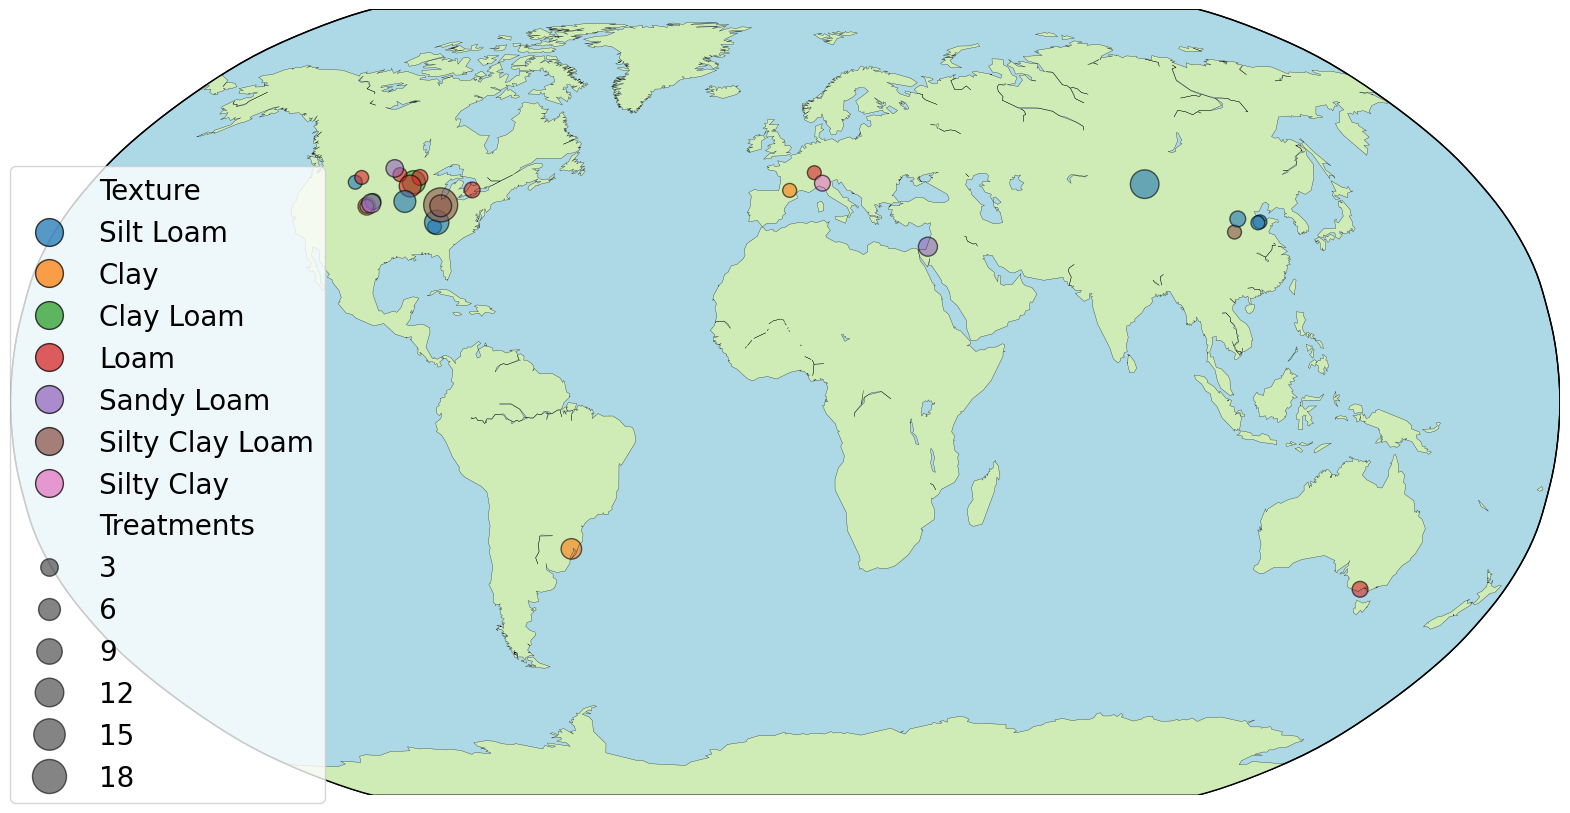

In [45]:
mapdf = pd.read_csv("map.csv")
from mpl_toolkits.basemap import Basemap

# When multiple rows have the same latitude and longitude, manually add  a small amount of noise to the latitude and longitude
# Get the indexes of rows where the lat/long combination is not unique
non_unique_indices = mapdf[mapdf.duplicated(subset=['Latitude', 'Longitude'], keep=False)].index

# Add a small amount of noise to the latitude and longitude
i = 0
for index in non_unique_indices:
    # if i is odd, add a small amount of noise to the latitude and longitude.
    if i % 2 == 1:
        mapdf.at[index, 'Latitude'] += 0.5
        mapdf.at[index, 'Longitude'] += 0.5
    # if i is even, subtract a small amount of noise to the latitude and longitude.
    else:
        mapdf.at[index, 'Latitude'] -= 0.5
        mapdf.at[index, 'Longitude'] -= 0.5
    i += 1


# Create a bubble map using seaborn
plt.figure(figsize=(20, 16))
m = Basemap(projection='robin', lon_0=0, lat_0=0, resolution='c')
m.fillcontinents(color='#CFEBB6', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
#m.drawcountries(linewidth=0.5, color='k')
m.drawcoastlines(linewidth=0.2, color='black')
# Plot bubbles
x, y = m(mapdf['Longitude'], mapdf['Latitude'])
g = sns.scatterplot(x=x, y=y, size=mapdf['Treatments'], sizes=(100, 600),  alpha=0.6, hue=mapdf['Texture'], edgecolor='black' , linewidth=1)

# Set legend font size
plt.rcParams['legend.fontsize'] = 20
# Set legend title font size
plt.rcParams['legend.title_fontsize'] = 20
plt.rc('font', family='Times New Roman')
# Set legend position

# Set the color legend marker size
handles, labels = g.get_legend_handles_labels()
legend = plt.legend(handles, labels, bbox_to_anchor=(0.00, 0.8), loc=2, borderaxespad=0., )
for handle in legend.legend_handles[:8]:
    handle.set_markersize(20)
    handle.set_alpha(0.75)
# Set label
labels[0] = ''
# Set font style to bold on 8th label
labels[8] = '\nTimeseries Count'


# Save seaborn plot as svg
plt.savefig('bubble_map.svg', dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

In [58]:
print(len(alldata.index))

6710


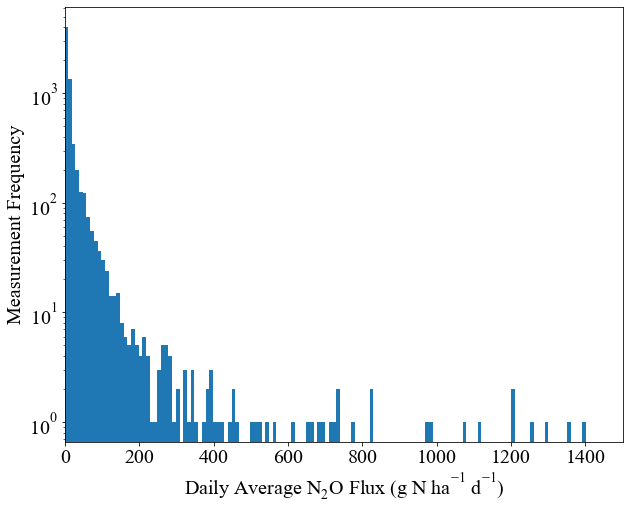

In [59]:
# Create a histogram of the N2OFlux
# Set fig size
plt.figure(figsize=(10, 8))
# Get the range of the N2OFlux column
fluxrange = alldata['N2OFlux'].max() - alldata['N2OFlux'].min()
bins = int(fluxrange/10)
plt.hist(alldata['N2OFlux'], bins=bins)
plt.xlabel('Daily Average $\mathregular{N_{2}O}$ Flux (g N $\mathregular{ha^{-1}}$ $\mathregular{d^{-1}}$)')
plt.ylabel('Measurement Frequency')
# Use log scale for y axis
plt.yscale('log')
# set x min and max
plt.xlim(0, 1501)
# Set x ticks
plt.xticks(np.arange(0, 1401, 200))
# Set font size to 20
plt.rc('font', size=28)
# Save seaborn plot as svg
plt.savefig('N2OFlux_hist.svg', dpi=600, bbox_inches='tight')
plt.show()

Index(['<i>Zea mays</i> (Corn)', '<i>Glycine max</i> (Soybean)',
       '<i>Panicum virgatum</i> (Switchgrass)',
       '<i>Hordeum vulgare</i> (Barley)', 'Triticum aestivum (Spring Wheat)',
       'Pasture', 'Rangeland', '<i>Lolium perenne</i> (Ryegrass)',
       '<i>Medicago sativa</i> (Alfalfa)', 'Triticum aestivum (Wheat)',
       'Pisum sativum (Pea)', 'Miscanthus sinensis (Miscanthus)',
       'Restored Prairie', 'Sorghum bicolor (Sorghum)', 'Cotton',
       'Allium fistulosum (Onion)'],
      dtype='object')


/tmp/ipykernel_32375/3938816084.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<i><i>Zea  mays</i> </i>(Corn)
<i><i>Glycine  max</i> </i>(Soybean)
<i><i>Panicum  virgatum</i> </i>(Switchgrass)
<i><i>Hordeum  vulgare</i> </i>(Barley)
<i>Triticum  aestivum </i>(Spring Wheat)
<i><i>Lolium  perenne</i> </i>(Ryegrass)
<i><i>Medicago  sativa</i> </i>(Alfalfa)
<i>Triticum  aestivum </i>(Wheat)
<i>Pisum  sativum </i>(Pea)
<i>Miscanthus  sinensis </i>(Miscanthus)
<i>Sorghum  bicolor </i>(Sorghum)
<i>Allium  fistulosum </i>(Onion)


/tmp/ipykernel_32375/3938816084.py:54: UserWarning:

FixedFormatter should only be used together with FixedLocator



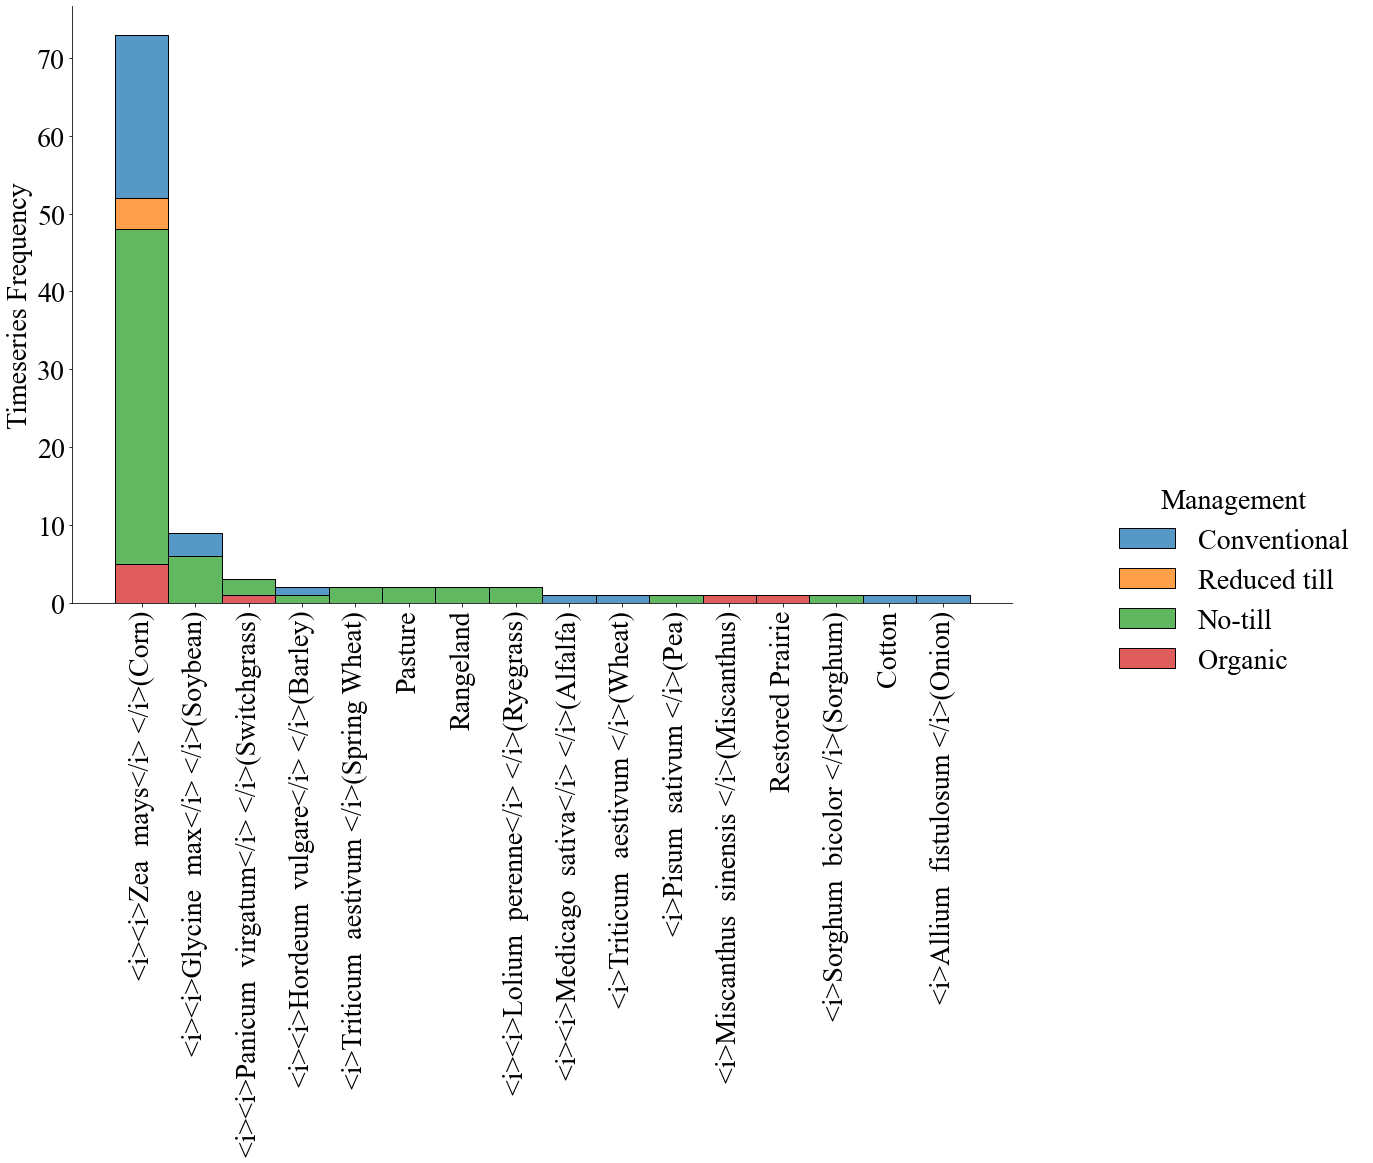

In [60]:
# Set figure size
# Create a stacked bar graph of the number of treatment IDs with X as PrimaryCrop and hue as Management
bardata = alldata.drop_duplicates(subset='TreatmentID')

bardata.loc[bardata['PrimaryCrop'].str.contains('Corn'), 'PrimaryCrop'] = '<i>Zea mays</i> (Corn)'

bardata.loc[bardata['PrimaryCrop'].str.contains('Soy'), 'PrimaryCrop'] = '<i>Glycine max</i> (Soybean)'

bardata.loc[bardata['PrimaryCrop'].str.contains('Barley'), 'PrimaryCrop'] = '<i>Hordeum vulgare</i> (Barley)'

bardata.loc[bardata['PrimaryCrop'].str.contains('Alfalfa'), 'PrimaryCrop'] = '<i>Medicago sativa</i> (Alfalfa)'

bardata.loc[bardata['PrimaryCrop'].str.contains('Switchgrass'), 'PrimaryCrop'] = '<i>Panicum virgatum</i> (Switchgrass)'

bardata.loc[bardata['PrimaryCrop'].str.contains('Rye'), 'PrimaryCrop'] = '<i>Lolium perenne</i> (Ryegrass)'

vc = bardata['PrimaryCrop'].value_counts().index
print((vc))
bardata['PrimaryCrop'] = pd.Categorical(bardata['PrimaryCrop'], categories=vc, ordered=True)


plt.rc('font', size=28)
# Set font to times new roman
plt.rc('font', family='Times New Roman')
#plt.rc('text', usetex=True)
sns.displot(data=bardata, x='PrimaryCrop', hue='Management', multiple='stack', height=10, aspect=16/10)
plt.xticks(rotation=90)
# Set x axis label
plt.xlabel('')
# Set y axis label
plt.ylabel('Timeseries Frequency')


# Alter the x axis labels to italicize text up until the first parenthesis
plt.rcParams['text.usetex'] = False
italic_start = '<i>'
italic_end = '</i>'
for label in plt.gca().get_xticklabels():
    # If there is a parenthesis in the label, italicize the text up until the parenthesis
    if '(' in label.get_text():
        # Get the position of the first parenthesis
        pos = label.get_text().find('(')
        # Get the potition of the first  space
        space_pos = label.get_text().find(' ')
        # Add italic to the text up until the parenthesis
        label.set_text(italic_start + label.get_text()[:space_pos] + " " + label.get_text()[space_pos:pos] + italic_end + label.get_text()[pos:])
        # Print the label text
        print(label.get_text())

    else:
        label.set_fontstyle('normal')

# Update the x axis labels
plt.gca().set_xticklabels(plt.gca().get_xticklabels())

# Save seaborn plot as svg
plt.savefig('crop_mgmt_bar.svg', dpi=600, bbox_inches='tight')
plt.show()

[-0.2  0.   0.2  0.4  0.6  0.8]
[-20, 0, 20, 40, 60, 80]


/tmp/ipykernel_32375/3933284568.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



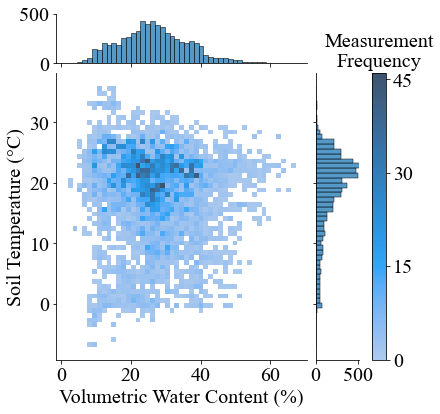

In [61]:
# create a joint plot of a heatmap of VWC and SoilT with histograms of each using seaborn
# Multiply all values in VWC column by 100
#alldata['VWC'] = alldata['VWC'] / 100
plt.rc('font', size=20)

kdeplot = sns.jointplot(data=alldata, x='VWC', y='SoilT',  kind='hist', cbar=True, marginal_ticks=True, )
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# reposition the joint ax so it has the same width as the marginal x ax
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# reposition the colorbar using new x positions and y positions of the joint ax
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
# Add colorbar title
kdeplot.fig.axes[-1].set_title('Measurement\nFrequency', fontsize=20)
# Set the histogram y limits
kdeplot.ax_marg_y.set_xlim(0,505)
kdeplot.ax_marg_x.set_ylim(0,500)
kdeplot.ax_marg_x.set_ylabel('')
kdeplot.ax_marg_y.set_xlabel('')
kdeplot.ax_joint.set_xlabel('Volumetric Water Content (%)')
kdeplot.ax_joint.set_ylabel('Soil Temperature (°C)')

# Set x axis tick labels to percentage (Multiply by 100)
xticks = kdeplot.ax_joint.get_xticks()
print(xticks)
xticks = [int(float(xtick)*100) for xtick in xticks]
print(xticks)
kdeplot.ax_joint.set_xticklabels(xticks)

# Set colorbar ticks
colorbar = kdeplot.fig.axes[-1]
colorbar.set_yticks([0, 15, 30, 45, ])
colorbar.set_yticklabels(['0', '15', '30', '45'])

# Save seaborn plot as svg
plt.savefig('VWC_SoilT_joint.svg', dpi=600, bbox_inches='tight')
plt.show()


In [62]:
# Print the unique PrimaryCrop and Management
print(alldata['Management'].value_counts())
print(alldata['PrimaryCrop'].value_counts())


No-till         3957
Conventional    2290
Organic          334
Reduced till     129
Name: Management, dtype: int64
Zea mays (Corn)                     4739
Glycine max (Soybean)                608
Pasture                              214
Rangeland                            214
Panicum virgatum (Switchgrass)       181
Hordeum vulgare (Barley)             142
Allium fistulosum (Onion)             84
Triticum aestivum (Wheat)             80
Pisum sativum (Pea)                   68
Ryegrass                              67
Miscanthus sinensis (Miscanthus)      63
Sorghum bicolor (Sorghum)             56
Restored Prairie                      53
Medicago sativa (Alfalfa)             51
Triticum aestivum (Spring Wheat)      47
Cotton                                39
Corn, Cowpea                           4
Name: PrimaryCrop, dtype: int64


In [135]:
# Set X and Y
X = alldata.drop(['N2OFlux', 'TreatmentID', 'ExperimentID', 'HMMCD', 'Date', 'RawID', 'HMTruth', 'PubTitle', 'Citation',
    'VWC_days_since_last_measurement', 'VWC_days_until_next_measurement'], axis = 1)
Y = alldata[['HMMCD', 'HMTruth']]

# Scale continuous variables
X_cont = X.drop(['PrimaryCrop', 'Management', 'last_fert_type'], axis = 1)
scaler = MinMaxScaler()
cols = X_cont.columns
X_scale = scaler.fit_transform(X_cont.to_numpy())
X_cont = pd.DataFrame(X_scale, columns=cols)

# Scale nominal variables with one hot encoding
X_nom = X[['PrimaryCrop', 'Management', 'last_fert_type']]
X_nom = pd.concat([X_nom,pd.get_dummies(X_nom['last_fert_type'], prefix='NitrogenType')],axis=1)
X_nom = pd.concat([X_nom,pd.get_dummies(X_nom['PrimaryCrop'], prefix='PrimaryCrop')],axis=1)
X_nom = pd.concat([X_nom,pd.get_dummies(X_nom['Management'], prefix='Management')],axis=1)
#X_nom = pd.concat([X_nom,pd.get_dummies(X_nom['Tillage'], prefix='Tillage')],axis=1)
X_nom = X_nom.drop(['PrimaryCrop', 'Management', 'last_fert_type'], axis = 1)

X_cont.reset_index(drop=True, inplace=True)
X_nom.reset_index(drop=True, inplace=True)
scaled_df = pd.concat([X_cont, X_nom], axis=1, join='inner')
scaled_df['HMTruth'] = list(alldata['HMTruth'])
scaled_df['N2OFlux'] = list(alldata['N2OFlux'])
scaled_df['HMMCD'] = list(alldata['HMMCD'])
scaled_df['RawID'] = list(alldata['RawID'])
scaled_df['TreatmentID'] = list(alldata['TreatmentID'])
scaled_df['ExperimentID'] = list(alldata['ExperimentID'])

# Randomly select one ExperimentID to be a validation holdout
np.random.seed(42)
validation_id = int(np.random.choice(scaled_df['ExperimentID'].unique(), size=1, replace=False))
validation_id = 51
print(validation_id)
validation = scaled_df.loc[scaled_df['ExperimentID'] == validation_id]
# Drop holdout from other data
scaled_df = scaled_df.loc[scaled_df['ExperimentID'] != validation_id]
alldata = alldata.loc[alldata['ExperimentID'] != validation_id]

# Where HMTruth = None set as training data, where HMTruth = 1 or 0 set as testing data
training = scaled_df[scaled_df['HMTruth'].isnull()]
testing = scaled_df.query('HMTruth >= 0')

# Set HMTruth and HMMCD to binary 
testing['HMTruth'] = np.where(testing['HMTruth'] == 1, 1, 0)
testing['HMMCD'] = np.where(testing['HMMCD'] == 1, 1, 0)



51


In [136]:
X = scaled_df.drop(['HMMCD', 'HMTruth', 'HMIQR', 'HMMAD', 'N2OFlux', 'NitrogenApplied'], axis = 1)
Y = scaled_df[['HMTruth', 'TreatmentID', 'RawID', 'HMMCD', 'NitrogenApplied', 'N2OFlux', 'last_fert', 'NitrogenType_ESN', 'NitrogenType_Urea',
               'NitrogenType_UAN', 'HMIQR', 'HMMAD']]
               
# Add unscaled 'VWC', 'SoilT', 'Precip' to Y
Y['VWC'] = list(alldata['VWC'])
Y['SoilT'] = list(alldata['SoilT'])
# Add last_fert_type to X
X_plus = X
X_plus['last_fert_type'] = list(alldata['last_fert_type'])
# Add the unscaled days_since_fert to X plus
X_plus['days_since_fert'] = list(alldata['days_since_fert'])

# Split validation 
X_validation = validation.drop(['HMMCD', 'HMTruth', 'HMIQR', 'HMMAD', 'N2OFlux', 'NitrogenApplied'], axis = 1)
Y_validation = validation[['HMTruth', 'TreatmentID', 'RawID', 'HMMCD', 'NitrogenApplied', 'N2OFlux', 'HMIQR']]

X_training = training.drop(['HMMCD', 'HMTruth', 'N2OFlux', 'NitrogenApplied', 'TreatmentID', 'RawID'], axis = 1)
Y_training_mcd = training[['HMTruth', 'TreatmentID', 'RawID', 'HMMCD', 'NitrogenApplied', 'N2OFlux', 'HMIQR']]
X_testing = testing.drop(['HMMCD', 'HMTruth',  'N2OFlux', 'NitrogenApplied', 'RawID'], axis = 1)
Y_testing = testing[['HMTruth', 'TreatmentID', 'RawID', 'HMMCD', 'NitrogenApplied', 'N2OFlux', 'HMIQR']]

/tmp/ipykernel_32375/2008606617.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32375/2008606617.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
print(X.columns)

Index(['DOY', 'VWC', 'SoilT', 'Precip', 'SandMean', 'SiltMean', 'ClayMean',
       'MAP', 'MAT', 'Latitude', 'Longitude', 'days_since_precip',
       'last_precip', 'days_since_fert', 'last_fert', 'vwc_dm1', 'vwc_dm2',
       'vwc_dm3', 'vwc_dm4', 'vwc_dm5', 'vwc_dm6', 'vwc_dm7', 'precip_dm1',
       'precip_dm2', 'precip_dm3', 'precip_dm4', 'precip_dm5', 'precip_dm6',
       'precip_dm7', 'soilT_dm1', 'soilT_dm2', 'soilT_dm3', 'soilT_dm4',
       'soilT_dm5', 'soilT_dm6', 'soilT_dm7', 'VWC_rollingmean',
       'SoilT_rollingmean', 'NitrogenType_Ammonia',
       'NitrogenType_Ammonium Nitrate', 'NitrogenType_Ammonium Phosphate',
       'NitrogenType_Anhydrous Ammonia', 'NitrogenType_Cover Crop',
       'NitrogenType_ESN', 'NitrogenType_Manure', 'NitrogenType_UAN',
       'NitrogenType_Unknown', 'NitrogenType_Urea',
       'PrimaryCrop_Allium fistulosum (Onion)', 'PrimaryCrop_Corn, Cowpea',
       'PrimaryCrop_Cotton', 'PrimaryCrop_Glycine max (Soybean)',
       'PrimaryCrop_Hordeum vul

In [138]:
# Save to csv
X.to_csv("X_all.csv", index=False)
X_plus.to_csv("X_plus.csv", index=False)
Y.to_csv("Y_all.csv", index=False)
X_training.to_csv("X_training.csv", index=False)
Y_training_mcd.to_csv("Y_training_mcd.csv", index=False)
X_testing.to_csv("X_testing.csv", index=False)
Y_testing.to_csv("Y_testing.csv", index=False)
X_validation.to_csv("X_validation.csv", index=False)
Y_validation.to_csv("Y_validation.csv", index=False)


In [307]:
# Load X and Y
X = pd.read_csv('X_all.csv')
Y = pd.read_csv('Y_all.csv')
X_validation = pd.read_csv('X_validation.csv')
Y_validation = pd.read_csv('Y_validation.csv')


## XGBoost Model

In [166]:
random_grid = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [5, 10, 20, 30, 50, 110, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1],
    'subsample': [.7, 1],
    'min_split_loss': [2, 5, 10, 20],
    'max_delta_step': [0, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 4],
    'alpha': [0, 1, 2, 5, 10],
    'lambda': [0, 1, 2, 5, 10],
    'tree_method': ['approx', 'hist', 'exact'],
    'scale_pos_weight': [1, 2, 5, 10],
    'nthread': [-1],
    }

# Load X and Y
X = pd.read_csv('X_all.csv')
Y = pd.read_csv('Y_all.csv')

# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores and stratify the folds
from sklearn.model_selection import GroupKFold
groups = X['TreatmentID']
cv = GroupKFold(n_splits=5)
xgb_random = RandomizedSearchCV(estimator = xgb, scoring='accuracy', param_distributions = random_grid, n_iter = 1000, verbose=2, random_state=42, n_jobs = -1, cv=cv) # Fit the random search model
xgb_random.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1), Y['HMTruth'], groups=groups)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END alpha=5, lambda=2, learning_rate=0.5, max_delta_step=5, max_depth=110, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=1, subsample=1, tree_method=hist; total time=   1.6s
[CV] END alpha=5, lambda=2, learning_rate=0.5, max_delta_step=5, max_depth=110, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=1, subsample=1, tree_method=hist; total time=   2.6s
[CV] END alpha=5, lambda=2, learning_rate=0.5, max_delta_step=5, max_depth=110, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=1, subsample=1, tree_method=hist; total time=   2.2s
[CV] END alpha=5, lambda=2, learning_rate=0.5, max_delta_step=5, max_depth=110, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=1, subsample=1, tree_method=hist; total time=   1.7s
[CV] END alpha=5, lambda=2, learning_rate=0.5, max_delta_st

/home/ryan/.virtualenv/time/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END alpha=0, lambda=2, learning_rate=0.05, max_delta_step=5, max_depth=10, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=10, subsample=1, tree_method=hist; total time=   1.7s
[CV] END alpha=0, lambda=2, learning_rate=0.05, max_delta_step=5, max_depth=10, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=10, subsample=1, tree_method=hist; total time=   1.4s
[CV] END alpha=0, lambda=2, learning_rate=0.05, max_delta_step=5, max_depth=10, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=10, subsample=1, tree_method=hist; total time=   1.7s
[CV] END alpha=0, lambda=2, learning_rate=0.05, max_delta_step=5, max_depth=10, min_child_weight=2, min_split_loss=20, n_estimators=500, nthread=-1, scale_pos_weight=10, subsample=1, tree_method=hist; total time=   1.9s
[CV] END alpha=0, lambda=2, learning_rate=0.05, max_delta_step=5, max_depth=10, min_child_weight=2, min_split_loss=20, n

RandomizedSearchCV(cv=GroupKFold(n_splits=5),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5, 1],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [5, 10, 20, 30, 50, 110,
                                                      None],
                                        'min_child_weight': [1, 2, 4],
                                        'min_split_loss': [2, 5, 10, 20],
                                        'n_estimators': [100, 500, 1000, 2000],
                                        'nthread': [-1],
                                        'scale_pos_weight': [1, 2, 5, 10],
                                        'subsample': [0.7, 1],
                                        'tree_method': ['approx', 'hist',
                                                        'exact']},
                   random_state=42, scoring='accuracy', verbose=2)

In [167]:
print(xgb_random.best_params_)
# Print the best score
print(xgb_random.best_score_)

{'tree_method': 'exact', 'subsample': 0.7, 'scale_pos_weight': 1, 'nthread': -1, 'n_estimators': 500, 'min_split_loss': 2, 'min_child_weight': 2, 'max_depth': 10, 'max_delta_step': 2, 'learning_rate': 0.1, 'lambda': 1, 'alpha': 10}
0.8671196778218183


In [308]:
# Implement a 10-fold cross validation manually
mcd_accuracy_list = []
mcd_mcc_list = []
mad_accuracy_list = []
mad_mcc_list = []
iqr_accuracy_list = []
iqr_mcc_list = []
true_accuracy_list = []
true_mcc_list = []
true_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])
mcd_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])
mad_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])
iqr_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])

xgb_classifier = XGBClassifier(
    tree_method = 'exact', subsample = 0.7, scale_pos_weight = 1, nthread = -1, n_estimators = 500, min_split_loss = 2, 
    min_child_weight = 2, max_depth = 10, max_delta_step = 2, learning_rate = 0.1, reg_lambda = 1, alpha = 10
)
print(X.drop(['TreatmentID', 'RawID', 'ExperimentID'], axis = 1).columns)
# Segment the dataset into 10 equal and stratified parts
groups = X['TreatmentID']
folds = StratifiedGroupKFold(n_splits=10).split(X, Y['HMTruth'], groups=groups)
#X = X.drop(['Category', 'Category2', 'last_fert_type'], axis = 1)
# Iterate through the 10 folds
for train_index, test_index in folds:
    # Get all the RawID values in the testing set
    test_raw_ids = X['RawID'].iloc[test_index]
    # Get the HMTruth values of Y where 'RawID' column value is in test_raw_ids
    test_truth = Y['HMTruth'].loc[Y['RawID'].isin(test_raw_ids)]

    ######### MCD #########
    # Train the model on the training set
    xgb_classifier.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = xgb_classifier.predict(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])

    calibrated_clf = CalibratedClassifierCV(xgb_classifier, method='sigmoid', cv=5)
    calibrated_clf.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])

    prediction_scores = calibrated_clf.predict_proba(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    print(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    print(prediction_scores)
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mcd_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mcd_mcc_list.append(mcc)

    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    mcd_predictions = pd.concat([mcd_predictions, predictions_df], ignore_index=True)
    print(prediction_scores)

    ########## MAD #########
    # Train the model on the training set
    xgb_classifier.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMAD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = xgb_classifier.predict(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mad_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mad_mcc_list.append(mcc)

    calibrated_clf = CalibratedClassifierCV(xgb_classifier, method='sigmoid', cv=5)
    calibrated_clf.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])

    prediction_scores = calibrated_clf.predict_proba(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    prediction_scores = [score[1] for score in prediction_scores]
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    mad_predictions = pd.concat([mad_predictions, predictions_df], ignore_index=True)

    ########## IQR #########
    # Train the model on the training set
    xgb_classifier.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMIQR'].iloc[train_index])
    # Make predictions on the testing set
    predictions = xgb_classifier.predict(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    iqr_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    iqr_mcc_list.append(mcc)

    calibrated_clf = CalibratedClassifierCV(xgb_classifier, method='sigmoid', cv=5)
    calibrated_clf.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])

    prediction_scores = calibrated_clf.predict_proba(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    prediction_scores = [score[1] for score in prediction_scores]
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    iqr_predictions = pd.concat([iqr_predictions, predictions_df], ignore_index=True)

    ########## True ##########
    # Train the model on the training set
    xgb_classifier.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMTruth'].iloc[train_index])
    # Make predictions on the testing set
    predictions = xgb_classifier.predict(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    true_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    true_mcc_list.append(mcc)

    calibrated_clf = CalibratedClassifierCV(xgb_classifier, method='sigmoid', cv=5)
    calibrated_clf.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMTruth'].iloc[train_index])

    prediction_scores = calibrated_clf.predict_proba(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).iloc[test_index])
    prediction_scores = [score[1] for score in prediction_scores]
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    true_predictions = pd.concat([true_predictions, predictions_df], ignore_index=True)



Index(['DOY', 'VWC', 'SoilT', 'Precip', 'SandMean', 'SiltMean', 'ClayMean',
       'MAP', 'MAT', 'Latitude', 'Longitude', 'days_since_precip',
       'last_precip', 'days_since_fert', 'last_fert', 'vwc_dm1', 'vwc_dm2',
       'vwc_dm3', 'vwc_dm4', 'vwc_dm5', 'vwc_dm6', 'vwc_dm7', 'precip_dm1',
       'precip_dm2', 'precip_dm3', 'precip_dm4', 'precip_dm5', 'precip_dm6',
       'precip_dm7', 'soilT_dm1', 'soilT_dm2', 'soilT_dm3', 'soilT_dm4',
       'soilT_dm5', 'soilT_dm6', 'soilT_dm7', 'VWC_rollingmean',
       'SoilT_rollingmean', 'NitrogenType_Ammonia',
       'NitrogenType_Ammonium Nitrate', 'NitrogenType_Ammonium Phosphate',
       'NitrogenType_Anhydrous Ammonia', 'NitrogenType_Cover Crop',
       'NitrogenType_ESN', 'NitrogenType_Manure', 'NitrogenType_UAN',
       'NitrogenType_Unknown', 'NitrogenType_Urea',
       'PrimaryCrop_Allium fistulosum (Onion)', 'PrimaryCrop_Corn, Cowpea',
       'PrimaryCrop_Cotton', 'PrimaryCrop_Glycine max (Soybean)',
       'PrimaryCrop_Hordeum vul

In [309]:
print(len(true_predictions))
print(len(Y))
# Drop duplicates of RawID, keep the last occurance
true_predictions = true_predictions.drop_duplicates(subset=['RawID'], keep='last')
true_predictions.to_csv('xgb_true_predictions.csv', index=False)
print(len(true_predictions))
print(len(Y))

6457
6457
6457
6457


In [310]:
 # Print the results
print("MCD Accuracy:", np.mean(mcd_accuracy_list))
print("MCD MCC:", np.mean(mcd_mcc_list))
print("MAD Accuracy:", np.mean(mad_accuracy_list))
print("MAD MCC:", np.mean(mad_mcc_list))
print("IQR Accuracy:", np.mean(iqr_accuracy_list))
print("IQR MCC:", np.mean(iqr_mcc_list))
print("True Accuracy:", np.mean(true_accuracy_list))
print("True MCC:", np.mean(true_mcc_list))

# Save the fold results to a CSV
#df = pd.DataFrame({'MCD Accuracy': mcd_accuracy_list, 'MCD MCC': mcd_mcc_list, 'MAD Accuracy': mad_accuracy_list, 'MAD MCC': mad_mcc_list,
#                   'IQR Accuracy': iqr_accuracy_list, 'IQR MCC': iqr_mcc_list, 'True Accuracy': true_accuracy_list, 'True MCC': true_mcc_list})
#df.to_csv('fold_results.csv', index=False)
# Save predictions to a CSV
true_predictions.to_csv('xgb_true_predictions.csv', index=False)
mcd_predictions.to_csv('xgb_mcd_predictions.csv', index=False)
mad_predictions.to_csv('xgb_mad_predictions.csv', index=False)
iqr_predictions.to_csv('xgb_iqr_predictions.csv', index=False)

MCD Accuracy: 0.8564579888447181
MCD MCC: 0.5988562560849278
MAD Accuracy: 0.8608332311012965
MAD MCC: 0.6004400997311505
IQR Accuracy: 0.8566974778694136
IQR MCC: 0.5468514393015355
True Accuracy: 0.8665699477990654
True MCC: 0.6027207527700774


In [198]:
# Train the model on the entire dataset
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(
    tree_method = 'exact', subsample = 0.7, scale_pos_weight = 1, nthread = -1, n_estimators = 500, min_split_loss = 2, 
    min_child_weight = 2, max_depth = 10, max_delta_step = 2, learning_rate = 0.1, reg_lambda = 1, alpha = 10
)

xgb_classifier.fit(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1), Y['HMTruth'])


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=10, max_leaves=None, min_child_weight=2,
              min_split_loss=2, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, nthread=-1, ...)

In [180]:
# Evaluate performance on the validation set
predictions = xgb_classifier.predict(X_validation.drop(['RawID', 'TreatmentID', 'ExperimentID', 'Latitude', 'Longitude'], axis = 1))

accuracy = metrics.accuracy_score(Y_validation['HMTruth'], predictions)
mcc = metrics.matthews_corrcoef(Y_validation['HMTruth'], predictions)
print(f'Accuracy: {accuracy}')
print(f'MCC: {mcc}')

# Print the contamination rate of the validation set
print(f'Contamination rate: {Y_validation["HMTruth"].sum() / len(Y_validation)}')
# Print predicted contamination rate
print(f'Predicted contamination rate: {predictions.sum() / len(predictions)}')



Accuracy: 0.6630434782608695
MCC: -0.0729195678935326
Contamination rate: 0.32608695652173914
Predicted contamination rate: 0.010869565217391304


In [200]:
# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot size
plt.figure(figsize=(10, 20))

feature_importance = xgb_classifier.feature_importances_
sns.barplot(x=feature_importance, y=X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type',], axis = 1).columns)
plt.show()


In [201]:
import pickle
# save the model to disk
filename = 'XGB_classification_model.sav'
pickle.dump(xgb_classifier, open(filename, 'wb'))

# MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier

random_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 50, 50), (100, 100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 500, 1000],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2, 0.3],
}

# Load X and Y
X = pd.read_csv('X_all.csv')
Y = pd.read_csv('Y_all.csv')

# Use the random grid to search for best hyperparameters
# First create the base model to tune
mlp = MLPClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores and stratify the folds
cv = GroupKFold(n_splits=5, shuffle=True, random_state=42)
mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = random_grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
mlp_random.fit(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1), Y['HMTruth'], groups=X['TreatmentID'])
# View the best parameters
print("Best Parameters:", mlp_random.best_params_)

In [268]:
# Print the best parameters
print("Best Parameters:", mlp_random.best_params_)

Best Parameters: {'validation_fraction': 0.2, 'solver': 'adam', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100, 100), 'early_stopping': True, 'alpha': 0.01, 'activation': 'relu'}


In [276]:
# Implement a 10-fold cross validation manually
mcd_accuracy_list = []
mcd_mcc_list = []
mad_accuracy_list = []
mad_mcc_list = []
iqr_accuracy_list = []
iqr_mcc_list = []
true_accuracy_list = []
true_mcc_list = []
true_mlp_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
mcd_mlp_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
mad_mlp_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
iqr_mlp_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
X = pd.read_csv('X_all.csv')

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,100, 100), activation='relu', solver='adam', alpha=0.01,
                               learning_rate='invscaling', max_iter=500, early_stopping=True, validation_fraction=0.2)

# Segment the dataset into 10 equal and stratified parts
folds = list(StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42).split(X, Y['HMTruth'], groups=X['TreatmentID']))

# Iterate through the 10 folds
for train_index, test_index in folds:
    # Get all the RawID values in the testing set
    test_raw_ids = X['RawID'].iloc[test_index]
    # Get the HMTruth values of Y where 'RawID' column value is in test_raw_ids
    test_truth = Y.loc[Y['RawID'].isin(test_raw_ids), 'HMTruth']

    ######### MCD #########
    # Train the model on the training set
    mlp_classifier.fit(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = mlp_classifier.predict(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = mlp_classifier.predict_proba(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mcd_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mcd_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    mcd_mlp_predictions = pd.concat([mcd_mlp_predictions, predictions_df], ignore_index=True)

    ######### MAD #########
    # Train the model on the training set
    mlp_classifier.fit(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMMAD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = mlp_classifier.predict(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = mlp_classifier.predict_proba(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mad_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mad_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    mad_mlp_predictions = pd.concat([mad_mlp_predictions, predictions_df], ignore_index=True)

    ######### IQR #########
    # Train the model on the training set
    mlp_classifier.fit(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMIQR'].iloc[train_index])
    # Make predictions on the testing set
    predictions = mlp_classifier.predict(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = mlp_classifier.predict_proba(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    iqr_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    iqr_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    iqr_mlp_predictions = pd.concat([iqr_mlp_predictions, predictions_df], ignore_index=True)

    ########## True ##########
    # Train the model on the training set
    mlp_classifier.fit(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[train_index], Y['HMTruth'].iloc[train_index])
    # Make predictions on the testing set
    predictions = mlp_classifier.predict(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = mlp_classifier.predict_proba(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    true_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    true_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    true_mlp_predictions = pd.concat([true_mlp_predictions, predictions_df], ignore_index=True)

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

In [277]:
# Print the accuracy and Matthews correlation coefficient for each fold
print(f"Accuracy for MCD: {np.mean(mcd_accuracy_list)}")
print(f"MCC for MCD: {np.mean(mcd_mcc_list)}")
print(f"Accuracy for MAD: {np.mean(mad_accuracy_list)}")
print(f"MCC for MAD: {np.mean(mad_mcc_list)}")
print(f"Accuracy for IQR: {np.mean(iqr_accuracy_list)}")
print(f"MCC for IQR: {np.mean(iqr_mcc_list)}")
print(f"Accuracy for True: {np.mean(true_accuracy_list)}")
print(f"MCC for True: {np.mean(true_mcc_list)}")

# Save the fold results to a CSV
fold_results = pd.DataFrame({
    'Fold': np.arange(1, 11),
    'MCD Accuracy': mcd_accuracy_list,
    'MCD MCC': mcd_mcc_list,
    'MAD Accuracy': mad_accuracy_list,
    'MAD MCC': mad_mcc_list,
    'IQR Accuracy': iqr_accuracy_list,
    'IQR MCC': iqr_mcc_list,
    'True Accuracy': true_accuracy_list,
    'True MCC': true_mcc_list
})

fold_results.to_csv('mlp_fold_results.csv', index=False)
# Save predictions to a CSV
true_mlp_predictions.to_csv('true_mlp_predictions.csv', index=False)
mcd_mlp_predictions.to_csv('mcd_mlp_predictions.csv', index=False)
mad_mlp_predictions.to_csv('mad_mlp_predictions.csv', index=False)
iqr_mlp_predictions.to_csv('iqr_mlp_predictions.csv', index=False)

Accuracy for MCD: 0.824495433090941
MCC for MCD: 0.461931647161199
Accuracy for MAD: 0.8368044069618501
MCC for MAD: 0.4843665386101269
Accuracy for IQR: 0.8195668402741847
MCC for IQR: 0.35883180532215075
Accuracy for True: 0.8295384725766084
MCC for True: 0.43131791740551095


 ## Random Forext Model


In [ ]:
random_grid = {
    'n_estimators': [100, 500, 1000, 2500, 5000],
    'max_depth': [10, 20, 30, 50, 80, 110, None],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20],
    'bootstrap': [True, False],
    }

# Load X and Y
X = pd.read_csv('X_all.csv')
Y = pd.read_csv('Y_all.csv')

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores and stratify the folds
cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, scoring='accuracy', param_distributions = random_grid, n_iter = 50, verbose=2, random_state=42, n_jobs = -1, cv=cv) # Fit the random search model
rf_random.fit(X.drop(['TreatmentID', 'RawID', 'last_fert_type'], axis = 1), Y['HMTruth'], groups=X['TreatmentID'])



In [280]:
# Print the best parameters
print(rf_random.best_params_)

{'n_estimators': 5000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 80, 'criterion': 'gini', 'bootstrap': True}


In [281]:
# Implement a 10-fold cross validation manually
mcd_accuracy_list = []
mcd_mcc_list = []
mad_accuracy_list = []
mad_mcc_list = []
iqr_accuracy_list = []
iqr_mcc_list = []
true_accuracy_list = []
true_mcc_list = []
true_rf_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
mcd_rf_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
mad_rf_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])
iqr_rf_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction', 'PredictionScore'])

rf_classifier = RandomForestClassifier(n_estimators= 5000, min_samples_split= 5, max_depth= 80,
                                    criterion='gini', min_samples_leaf=1, max_features='log2', bootstrap='False',max_leaf_nodes=None)

# Segment the dataset into 10 equal and stratified parts
folds = list(StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42).split(X, Y['HMTruth'], groups=groups))

X = X.drop(['last_fert_type',], axis = 1)

# Iterate through the 10 folds
for train_index, test_index in folds:
    # Get all the RawID values in the testing set
    test_raw_ids = X['RawID'].iloc[test_index]
    # Get the HMTruth values of Y where 'RawID' column value is in test_raw_ids
    test_truth = Y['HMTruth'].loc[Y['RawID'].isin(test_raw_ids)]

    ######### MCD #########
    # Train the model on the training set
    rf_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = rf_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = rf_classifier.predict_proba(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mcd_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mcd_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    mcd_rf_predictions = pd.concat([mcd_rf_predictions, predictions_df], ignore_index=True)

    ########## MAD #########
    # Train the model on the training set
    rf_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMMAD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = rf_classifier.predict(X.drop(['TreatmentID', 'RawID',], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = rf_classifier.predict_proba(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mad_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mad_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    mad_rf_predictions = pd.concat([mad_rf_predictions, predictions_df], ignore_index=True)

    ########## IQR #########
    # Train the model on the training set
    rf_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMIQR'].iloc[train_index])
    # Make predictions on the testing set
    predictions = rf_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = rf_classifier.predict_proba(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    iqr_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    iqr_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    iqr_rf_predictions = pd.concat([iqr_rf_predictions, predictions_df], ignore_index=True)

    ########## True ##########
    # Train the model on the training set
    rf_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMTruth'].iloc[train_index])
    # Make predictions on the testing set
    predictions = rf_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Get the prediction scores
    prediction_scores = rf_classifier.predict_proba(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # For each 2D array in prediction_scores, get the second value
    prediction_scores = [score[1] for score in prediction_scores]
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    true_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    true_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    predictions_df = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions, 'PredictionScore': prediction_scores})
    # Append the DataFrame to the true_predictions DataFrame
    true_rf_predictions = pd.concat([true_rf_predictions, predictions_df], ignore_index=True)


In [282]:
# Print the accuracy and Matthews correlation coefficient for each fold
print(f"Accuracy for MCD: {np.mean(mcd_accuracy_list)}")
print(f"MCC for MCD: {np.mean(mcd_mcc_list)}")
print(f"Accuracy for MAD: {np.mean(mad_accuracy_list)}")
print(f"MCC for MAD: {np.mean(mad_mcc_list)}")
print(f"Accuracy for IQR: {np.mean(iqr_accuracy_list)}")
print(f"MCC for IQR: {np.mean(iqr_mcc_list)}")
print(f"Accuracy for True: {np.mean(true_accuracy_list)}")
print(f"MCC for True: {np.mean(true_mcc_list)}")

# Save the fold results to a CSV
fold_results = pd.DataFrame({
    'Fold': np.arange(1, 11),
    'MCD Accuracy': mcd_accuracy_list,
    'MCD MCC': mcd_mcc_list,
    'MAD Accuracy': mad_accuracy_list,
    'MAD MCC': mad_mcc_list,
    'IQR Accuracy': iqr_accuracy_list,
    'IQR MCC': iqr_mcc_list,
    'True Accuracy': true_accuracy_list,
    'True MCC': true_mcc_list
})
fold_results.to_csv('rf_fold_results.csv', index=False)
# Save predictions to a CSV
true_rf_predictions.to_csv('true_rf_predictions.csv', index=False)
mcd_rf_predictions.to_csv('mcd_rf_predictions.csv', index=False)
mad_rf_predictions.to_csv('mad_rf_predictions.csv', index=False)
iqr_rf_predictions.to_csv('iqr_rf_predictions.csv', index=False)

Accuracy for MCD: 0.8502541615632155
MCC for MCD: 0.5661975669054643
Accuracy for MAD: 0.8610346399982431
MCC for MAD: 0.58146044202642
Accuracy for IQR: 0.8533521940431257
MCC for IQR: 0.5107004170482108
Accuracy for True: 0.8744192672055116
MCC for True: 0.6001721114299345


In [141]:
# Train the model on the entire dataset
rf_classifier = RandomForestClassifier(n_estimators= 500, min_samples_split= 5, max_depth= 20,
                                    criterion='gini', min_samples_leaf=1, max_features='sqrt', bootstrap='False',)
rf_classifier.fit(X.drop(['TreatmentID', 'RawID',], axis = 1), Y['HMTruth'])

RandomForestClassifier(bootstrap='False', max_depth=20, max_features='sqrt',
                       min_samples_split=5, n_estimators=500)

In [142]:
# Save the RF model
import pickle
filename = 'RF_classification_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

## KNN Model

In [283]:
from sklearn.neighbors import KNeighborsClassifier
random_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 30, 40, 50],
}

knn_classifier = KNeighborsClassifier()
cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
knn_random = RandomizedSearchCV(estimator = knn_classifier, scoring='accuracy', param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1, cv=cv) # Fit the random search model
knn_random.fit(X.drop(['TreatmentID', 'RawID'], axis = 1), Y['HMTruth'], groups=groups)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, weights=distance; total time=   0.3s
[CV] END algorithm=kd_tree, leaf_size=50, n_neighbors=7, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=kd_tree, leaf_size=50, n_neighbors=7, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, weights=distance; total time=   0.3s
[CV] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, leaf_size=50, n_neighbors=7, p=2, weights=uniform; total time=   0.4s
[CV] END algorithm=kd_tree, leaf_size=50, n_neighbors=7, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=kd_tree, leaf_size=50, n_neighb

RandomizedSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 30, 40, 50],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=2)

In [284]:
# Print the best parameters and best score
print("Best Parameters:", knn_random.best_params_)
print("Best Score:", knn_random.best_score_)

Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 50, 'algorithm': 'ball_tree'}
Best Score: 0.8395961399242747


In [285]:
# Implement a 10-fold cross validation manually
mcd_accuracy_list = []
mcd_mcc_list = []
mad_accuracy_list = []
mad_mcc_list = []
iqr_accuracy_list = []
iqr_mcc_list = []
true_accuracy_list = []
true_mcc_list = []
true_knn_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])
mcd_knn_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])
mad_knn_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])
iqr_knn_predictions = pd.DataFrame(columns=['RawID', 'HMTruth', 'Prediction'])

folds = list(StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=1).split(X, Y['HMTruth'], groups=X['TreatmentID']))
knn_classifier = KNeighborsClassifier(weights='distance', p=1, n_neighbors=11, leaf_size=50, algorithm='ball_tree')

# Iterate through the 10 folds
for train_index, test_index in folds:
    # Get all the RawID values in the testing set
    test_raw_ids = X['RawID'].iloc[test_index]
    # Get the HMTruth values of Y where 'RawID' column value is in test_raw_ids
    test_truth = Y['HMTruth'].loc[Y['RawID'].isin(test_raw_ids)]

    ######### MCD #########
    # Train the model on the training set
    knn_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = knn_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mcd_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mcd_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    knn_predictions = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions})
    # Append the DataFrame to the true_knn_predictions DataFrame
    mcd_knn_predictions = pd.concat([mcd_knn_predictions, knn_predictions], ignore_index=True)

    ########## MAD #########
    # Train the model on the training set
    knn_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMMAD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = knn_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mad_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mad_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    knn_predictions = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions})
    # Append the DataFrame to the true_knn_predictions DataFrame
    mad_knn_predictions = pd.concat([mad_knn_predictions, knn_predictions], ignore_index=True)

    ########## IQR ##########
    # Train the model on the training set
    knn_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMIQR'].iloc[train_index])
    # Make predictions on the testing set
    predictions = knn_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    iqr_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    iqr_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    knn_predictions = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions})
    # Append the DataFrame to the true_knn_predictions DataFrame
    iqr_knn_predictions = pd.concat([iqr_knn_predictions, knn_predictions], ignore_index=True)

    ########## True ##########
    # Train the model on the training set
    knn_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMTruth'].iloc[train_index])
    # Make predictions on the testing set
    predictions = knn_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    true_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    true_mcc_list.append(mcc)
    # Create a DataFrame with the RawID, HMTruth, and predictions
    knn_predictions = pd.DataFrame({'RawID': test_raw_ids, 'HMTruth': test_truth, 'Prediction': predictions})
    # Append the DataFrame to the true_knn_predictions DataFrame
    true_knn_predictions = pd.concat([true_knn_predictions, knn_predictions], ignore_index=True)

In [286]:
# Print the accuracy and Matthews correlation coefficient for each fold
print("MCD Accuracy:", np.mean(mcd_accuracy_list))
print("MCD MCC:", np.mean(mcd_mcc_list))
print("MAD Accuracy:", np.mean(mad_accuracy_list))
print("MAD MCC:", np.mean(mad_mcc_list))
print("IQR Accuracy:", np.mean(iqr_accuracy_list))
print("IQR MCC:", np.mean(iqr_mcc_list))
print("True Accuracy:", np.mean(true_accuracy_list))
print("True MCC:", np.mean(true_mcc_list))
# Save the fold results to a CSV
df = pd.DataFrame({'MCD Accuracy': mcd_accuracy_list, 'MCD MCC': mcd_mcc_list, 'MAD Accuracy': mad_accuracy_list, 'MAD MCC': mad_mcc_list,
                   'IQR Accuracy': iqr_accuracy_list, 'IQR MCC': iqr_mcc_list, 'True Accuracy': true_accuracy_list, 'True MCC': true_mcc_list})
df.to_csv('knn_fold_results.csv', index=False)
# Save predictions to a CSV
true_knn_predictions.to_csv('true_knn_predictions.csv', index=False)
mcd_knn_predictions.to_csv('mcd_knn_predictions.csv', index=False)
mad_knn_predictions.to_csv('mad_knn_predictions.csv', index=False)
iqr_knn_predictions.to_csv('iqr_knn_predictions.csv', index=False)

MCD Accuracy: 0.8199552312592632
MCD MCC: 0.5077180605434626
MAD Accuracy: 0.8261207892087038
MAD MCC: 0.5111247922084434
IQR Accuracy: 0.8399520620598834
IQR MCC: 0.49700074393089644
True Accuracy: 0.8385439767495075
True MCC: 0.5198046895754043


## Support Vector Machine Model

In [287]:
from sklearn.svm import SVC
random_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['balanced', None],
    'tol': [0.1, 0.01, 0.001, 0.0001]
}
svc_classifier = SVC()
cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
svc_random = RandomizedSearchCV(estimator = svc_classifier, param_distributions = random_grid, n_iter = 50, cv = cv, verbose=2, random_state=42, n_jobs = -1)
svc_random.fit(X.drop(['TreatmentID', 'RawID'], axis = 1), Y['HMTruth'], groups=X['TreatmentID'])

KeyboardInterrupt: 

In [ ]:
from sklearn.svm import LinearSVC

linear_svc_params = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'max_iter': [200, 700, 1000, 2000, 5000],
    'tol': [1e-5, 1e-4, 1e-3, 1e-2]
}

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

linear_svc_random = RandomizedSearchCV(
    estimator=LinearSVC(random_state=42, dual=False),
    param_distributions=linear_svc_params,
    n_iter=100,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

print("Training LinearSVC...")
linear_svc_random.fit(X.drop(['TreatmentID', 'RawID'], axis=1), Y['HMTruth'], groups=X['TreatmentID'])

print("LinearSVC Best parameters:", linear_svc_random.best_params_)
print("LinearSVC Best score:", linear_svc_random.best_score_)

In [299]:
print("LinearSVC Best parameters:", linear_svc_random.best_params_)
print("LinearSVC Best score:", linear_svc_random.best_score_)

LinearSVC Best parameters: {'tol': 0.0001, 'penalty': 'l1', 'max_iter': 200, 'loss': 'squared_hinge', 'class_weight': None, 'C': 0.1}
LinearSVC Best score: 0.8095551097080195


In [ ]:
# Implement a 10-fold cross validation manually
mcd_accuracy_list = []
mcd_mcc_list = []
mad_accuracy_list = []
mad_mcc_list = []
iqr_accuracy_list = []
iqr_mcc_list = []
true_accuracy_list = []
true_mcc_list = []

splits = list(StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=1).split(X.drop(['TreatmentID', 'RawID'], axis = 1), Y['HMTruth'], groups=X['TreatmentID']))
svc_classifier = LinearSVC(C=0.1, loss='squared_hinge', penalty='l1', class_weight=None, max_iter=2000, tol=0.0001, dual=False)

for train_index, test_index in splits:
    # Get all the RawID values in the testing set
    test_raw_ids = X['RawID'].iloc[test_index]
    # Get the HMTruth values of Y where 'RawID' column value is in test_raw_ids
    test_truth = Y['HMTruth'].loc[Y['RawID'].isin(test_raw_ids)]

    ######### MCD #########
    # Train the model on the training set
    svc_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMMCD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = svc_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mcd_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mcd_mcc_list.append(mcc)

    ########## MAD #########
    # Train the model on the training set
    svc_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMMAD'].iloc[train_index])
    # Make predictions on the testing set
    predictions = svc_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    mad_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    mad_mcc_list.append(mcc)

    ########## IQR #########
    # Train the model on the training set
    svc_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMIQR'].iloc[train_index])
    # Make predictions on the testing set
    predictions = svc_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    iqr_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    iqr_mcc_list.append(mcc)

    ########## True ##########
    # Train the model on the training set
    svc_classifier.fit(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[train_index], Y['HMTruth'].iloc[train_index])
    # Make predictions on the testing set
    predictions = svc_classifier.predict(X.drop(['TreatmentID', 'RawID'], axis = 1).iloc[test_index])
    # Calculate the accuracy of the predictions on the true labels
    accuracy = metrics.accuracy_score(test_truth, predictions)
    true_accuracy_list.append(accuracy)
    # Calculate the Matthews correlation coefficient of the predictions on the true labels
    mcc = metrics.matthews_corrcoef(test_truth, predictions)
    true_mcc_list.append(mcc)

print("MCD Accuracy:", np.mean(mcd_accuracy_list))
print("MCD MCC:", np.mean(mcd_mcc_list))
print("MAD Accuracy:", np.mean(mad_accuracy_list))
print("MAD MCC:", np.mean(mad_mcc_list))
print("IQR Accuracy:", np.mean(iqr_accuracy_list))
print("IQR MCC:", np.mean(iqr_mcc_list))
print("True Accuracy:", np.mean(true_accuracy_list))
print("True MCC:", np.mean(true_mcc_list))
# Save the fold results to a CSV
df = pd.DataFrame({'MCD Accuracy': mcd_accuracy_list, 'MCD MCC': mcd_mcc_list, 'MAD Accuracy': mad_accuracy_list, 'MAD MCC': mad_mcc_list,
                   'IQR Accuracy': iqr_accuracy_list, 'IQR MCC': iqr_mcc_list, 'True Accuracy': true_accuracy_list, 'True MCC': true_mcc_list})
df.to_csv('svc_fold_results.csv', index=False)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to conve

MCD Accuracy: 0.7989341220862695
MCD MCC: 0.3992997651098287
MAD Accuracy: 0.8086927386868734
MAD MCC: 0.3942575293394127
IQR Accuracy: 0.7906716378605324
IQR MCC: 0.2498033209915717
True Accuracy: 0.808004240928482
True MCC: 0.3735614043209266


## Figures

In [187]:
# Load the XGB predictions csvs
true_predictions = pd.read_csv("xgb_true_predictions.csv")
mcd_predictions = pd.read_csv("xgb_mcd_predictions.csv")
mad_predictions = pd.read_csv("xgb_mad_predictions.csv")
iqr_predictions = pd.read_csv("xgb_iqr_predictions.csv")


# Create a ROC curve for each classification method from the prediction scores
true_fpr, true_tpr, true_thresholds = metrics.roc_curve(true_predictions['HMTruth'], true_predictions['PredictionScore'])
mcd_fpr, mcd_tpr, mcd_thresholds = metrics.roc_curve(mcd_predictions['HMTruth'], mcd_predictions['PredictionScore'])
mad_fpr, mad_tpr, mad_thresholds = metrics.roc_curve(mad_predictions['HMTruth'], mad_predictions['PredictionScore'])
iqr_fpr, iqr_tpr, iqr_thresholds = metrics.roc_curve(iqr_predictions['HMTruth'], iqr_predictions['PredictionScore'])

true_auc = metrics.auc(true_fpr, true_tpr)
mcd_auc = metrics.auc(mcd_fpr, mcd_tpr)
mad_auc = metrics.auc(mad_fpr, mad_tpr)
iqr_auc = metrics.auc(iqr_fpr, iqr_tpr)
print(true_auc)
print(mcd_auc)
print(mad_auc)
print(iqr_auc)

# Plot the ROC curves

fig1 = plt.gcf()
fig = plt.figure(figsize=(5, 5))
plt.plot(true_fpr, true_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {true_auc:.2f})')



# Find the tpr and fpr at the same index where rounded threshold = 0.5
index_05 = np.where(np.round(true_thresholds, 2) == 0.5)[0][0]
true_tpr_05 = true_tpr[index_05]
true_fpr_05 = true_fpr[index_05]
print(true_thresholds)
print(true_thresholds[index_05])
# plot a marker at the tpr and fpr where threshold = 0.5, set size of marker to 100
plt.plot(true_fpr_05, true_tpr_05, 'ro', markersize=10)
# Annotate the marker with the threshold value
plt.annotate('p = ' + f'{float(true_thresholds[index_05]):.2f}', (true_fpr_05, true_tpr_05),
             textcoords="offset points", xytext=(40,0), ha='center')

# Find the tpr and fpr at the same index where rounded threshold = 0.7
index_08 = np.where(np.round(true_thresholds, 2) == 0.7)[0][0]
true_tpr_08 = true_tpr[index_08]
true_fpr_08 = true_fpr[index_08]
# plot a marker at the tpr and fpr where threshold = 0.8, set size of marker to 100
plt.plot(true_fpr_08, true_tpr_08, 'ro', markersize=10)
# Annotate the marker with the threshold value
plt.annotate('p = ' + f'{float(true_thresholds[index_08]):.2f}', (true_fpr_08, true_tpr_08),
             textcoords="offset points", xytext=(40,0), ha='center')

# Find the tpr and fpr at the same index where rounded threshold = 0.3
index_03 = np.where(np.round(true_thresholds, 2) == 0.3)[0][0]
true_tpr_03 = true_tpr[index_03]
true_fpr_03 = true_fpr[index_03]
# plot a marker at the tpr and fpr where threshold = 0.3, set size of marker to 100
plt.plot(true_fpr_03, true_tpr_03, 'ro', markersize=10)
# Annotate the marker with the threshold value
plt.annotate('p = ' + f'{float(true_thresholds[index_03]):.2f}', (true_fpr_03, true_tpr_03),
             textcoords="offset points", xytext=(40,0), ha='center')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Set all text to times new roman
plt.rcParams['font.family'] = 'Times New Roman'
# change the tick labels to percentage format
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
# set font size to 12
plt.rcParams['font.size'] = 18

plt.show()

# Save the plot
fig.savefig('roc_curves.svg', dpi=300, bbox_inches='tight')


0.8817875655760747
0.8879411537443508
0.8879411537443508
0.8879411537443508
[1.76176194 0.76176194 0.71739329 ... 0.08112791 0.08105395 0.07678382]
0.5042744278907776


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 432x288 with 0 Axes>

Index(['RawID', 'HMTruth_x', 'Prediction', 'PredictionScore', 'HMTruth_y',
       'TreatmentID', 'HMMCD', 'NitrogenApplied', 'N2OFlux', 'last_fert',
       'NitrogenType_ESN', 'NitrogenType_Urea', 'NitrogenType_UAN', 'HMIQR',
       'HMMAD', 'VWC', 'SoilT'],
      dtype='object')


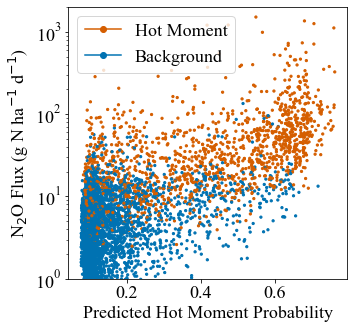

In [188]:
# Load the XGB predictions csvs
true_predictions = pd.read_csv("xgb_true_predictions.csv")
Y = pd.read_csv("Y_all.csv")
# add the N2OFlux column from Y to true_predictions where RawID = RawID
true_predictions = true_predictions.merge(Y, on='RawID')
print(true_predictions.columns)
# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# Set font size to 12
plt.rcParams['font.size'] = 18

# Plot scatterplot of N2OFlux vs PredictionScore, set y axis to log scale, set hue to HMTruth
fig = plt.figure(figsize=(5, 5))
cmap = ['#0072b2', '#d55e00', ]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(cmap)
plt.scatter(true_predictions['PredictionScore'], true_predictions['N2OFlux'], 
    c=true_predictions['HMTruth_x'], s=5, alpha=1, cmap=cmap)
plt.xlabel('Predicted Hot Moment Probability')
plt.ylabel('N$_{2}$O Flux (g N ha$^{-1}$ d$^{-1}$)')
plt.yscale('log')
# Set y axis limits
plt.ylim(1, 2000)
# Add items to legend, red = Hot Moment, blue = Background, use circle markers, use seismic color map 
plt.legend(handles=[plt.Line2D([0], [0], color='#d55e00', marker='o', markerfacecolor='#d55e00'), 
    plt.Line2D([0], [0], color='#0072b2', marker='o', markerfacecolor='#0072b2')], 
    labels=['Hot Moment', 'Background'], loc='upper left')

# Save the plot as svg
plt.savefig('N2OFlux_vs_PredictionScore.svg', dpi=300, bbox_inches='tight')

plt.show()




In [288]:
# Load the rf predictions csvs
true_predictions = pd.read_csv("xgb_true_predictions.csv")
mcd_predictions = pd.read_csv("mcd_xgb_predictions.csv")
mad_predictions = pd.read_csv("mad_xgb_predictions.csv")
iqr_predictions = pd.read_csv("iqr_xgb_predictions.csv")

# Connect to mysql database
cnx = mysql.connector.connect(user='root', password='Kh18riku!',
                                host='127.0.0.1',
                                database='global_n2o')
cursor = cnx.cursor()

query = ("SELECT * FROM RawClassificationTreatment")
# Execute the query and fetch all results
alldata = pd.read_sql(query, cnx)
cnx.close()
# Starting with -5 and ending with 50, create bins of width 5. Find the percent of correct predictions in each bin
bin_edges = np.arange(-5, 51, 5)
bin_centers = bin_edges[:-1] + 2.5
# Create a new bin edge and center for all data above 50
bin_edges = np.append(bin_edges, 5000)
bin_centers = np.append(bin_centers, 52.5)
# Assign a bin to each N2OFlux value
alldata['Bin'] = pd.cut(alldata['N2OFlux'], bins=bin_edges, labels=bin_centers)
print(alldata['Bin'].value_counts())


# Add the N2OFlux columns to the predictions dataframes, merge on RawID
true_predictions = pd.merge(true_predictions, alldata[['RawID', 'N2OFlux', 'Bin']], on='RawID')
mcd_predictions = pd.merge(mcd_predictions, alldata[['RawID', 'N2OFlux', 'Bin']], on='RawID')
mad_predictions = pd.merge(mad_predictions, alldata[['RawID', 'N2OFlux', 'Bin']], on='RawID')
iqr_predictions = pd.merge(iqr_predictions, alldata[['RawID', 'N2OFlux', 'Bin']], on='RawID')

publications = pd.merge(iqr_predictions, alldata[['RawID', 'N2OFlux', 'PubID']], on='RawID')
# Print the number of unique publications

print(publications['PubID'].nunique())
print(publications['PubID'].unique)
'''
# Drop rows without bins
true_predictions = true_predictions.dropna(subset=['Bin'])
mcd_predictions = mcd_predictions.dropna(subset=['Bin'])
mad_predictions = mad_predictions.dropna(subset=['Bin'])
iqr_predictions = iqr_predictions.dropna(subset=['Bin'])
alldata = alldata.dropna(subset=['Bin'])
# Add a new column to which =1 if the prediction is correct and 0 if the prediction is incorrect
true_predictions['Correct'] = np.where(true_predictions['HMTruth'] == true_predictions['Prediction'], 1, 0)
mcd_predictions['Correct'] = np.where(mcd_predictions['HMTruth'] == mcd_predictions['Prediction'], 1, 0)
mad_predictions['Correct'] = np.where(mad_predictions['HMTruth'] == mad_predictions['Prediction'], 1, 0)
iqr_predictions['Correct'] = np.where(iqr_predictions['HMTruth'] == iqr_predictions['Prediction'], 1, 0)
# Create column for type of errors. 1 = type 1 error, 2 = type 2 error
true_predictions['ErrorType'] = np.where((true_predictions['HMTruth'] == 0) & (true_predictions['Prediction'] == 1), 1, 0)
true_predictions['ErrorType'] = np.where((true_predictions['HMTruth'] == 1) & (true_predictions['Prediction'] == 0), 2, true_predictions['ErrorType'])
mcd_predictions['ErrorType'] = np.where((mcd_predictions['HMTruth'] == 0) & (mcd_predictions['Prediction'] == 1), 1, 0)
mcd_predictions['ErrorType'] = np.where((mcd_predictions['HMTruth'] == 1) & (mcd_predictions['Prediction'] == 0), 2, mcd_predictions['ErrorType'])
mad_predictions['ErrorType'] = np.where((mad_predictions['HMTruth'] == 0) & (mad_predictions['Prediction'] == 1), 1, 0)
mad_predictions['ErrorType'] = np.where((mad_predictions['HMTruth'] == 1) & (mad_predictions['Prediction'] == 0), 2, mad_predictions['ErrorType'])
iqr_predictions['ErrorType'] = np.where((iqr_predictions['HMTruth'] == 0) & (iqr_predictions['Prediction'] == 1), 1, 0)
iqr_predictions['ErrorType'] = np.where((iqr_predictions['HMTruth'] == 1) & (iqr_predictions['Prediction'] == 0), 2, iqr_predictions['ErrorType'])

# Create a dataframe tracking the classification method, bin, and error types/rates
error_df = pd.DataFrame(columns=['Classification', 'Bin', 'TP', 'FP', 'TN', 'FN'])
df_list = [true_predictions, mcd_predictions, mad_predictions, iqr_predictions]
classification_list = ['True', 'MCD', 'MAD', 'IQR']
i=0
for classification in df_list:
    # For each bin, find the percent of correct predictions and incorrect predictions
    for bin in alldata['Bin'].unique():
        print(bin)
        # Get only the rows in the correct bin
        bindf = classification[classification['Bin'] == bin]
        print(bindf.head())
        tp_percent = len(bindf[(bindf['Correct'] == 1) & (bindf['HMTruth'] == 1)].index) / len(bindf.index)
        fp_percent = len(bindf[(bindf['Correct'] == 0) & (bindf['HMTruth'] == 0)].index) / len(bindf.index)
        tn_percent = len(bindf[(bindf['Correct'] == 1) & (bindf['HMTruth'] == 0)].index) / len(bindf.index)
        fn_percent = len(bindf[(bindf['Correct'] == 0) & (bindf['HMTruth'] == 1)].index) / len(bindf.index)
        error_df = error_df.append({'Classification': classification_list[i], 'Bin': bin, 'TP': tp_percent, 'FP': fp_percent, 'TN': tn_percent, 'FN': fn_percent}, ignore_index=True)
    i=i+1

# Save error_df to a CSV
error_df.to_csv('error_df.csv', index=False)
'''

/home/ryan/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



2.5     14059
7.5      3435
12.5     1748
52.5      979
17.5      850
-2.5      703
22.5      502
27.5      346
32.5      253
42.5      168
37.5      161
47.5      128
Name: Bin, dtype: int64
26
<bound method Series.unique of 0        4
1        4
2        4
3        4
4        4
        ..
6748    59
6749    59
6750    59
6751    59
6752    59
Name: PubID, Length: 6753, dtype: int64>


"\n# Drop rows without bins\ntrue_predictions = true_predictions.dropna(subset=['Bin'])\nmcd_predictions = mcd_predictions.dropna(subset=['Bin'])\nmad_predictions = mad_predictions.dropna(subset=['Bin'])\niqr_predictions = iqr_predictions.dropna(subset=['Bin'])\nalldata = alldata.dropna(subset=['Bin'])\n# Add a new column to which =1 if the prediction is correct and 0 if the prediction is incorrect\ntrue_predictions['Correct'] = np.where(true_predictions['HMTruth'] == true_predictions['Prediction'], 1, 0)\nmcd_predictions['Correct'] = np.where(mcd_predictions['HMTruth'] == mcd_predictions['Prediction'], 1, 0)\nmad_predictions['Correct'] = np.where(mad_predictions['HMTruth'] == mad_predictions['Prediction'], 1, 0)\niqr_predictions['Correct'] = np.where(iqr_predictions['HMTruth'] == iqr_predictions['Prediction'], 1, 0)\n# Create column for type of errors. 1 = type 1 error, 2 = type 2 error\ntrue_predictions['ErrorType'] = np.where((true_predictions['HMTruth'] == 0) & (true_predictions['P

In [148]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create a histogram of the percent of correct predictions and incorrect predictions for each bin
error_df = pd.read_csv("error_df.csv")

# Create a 2 by 2 grid of subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('True', 'MCD', 'MAD', 'IQR'), horizontal_spacing = 0.02, vertical_spacing = 0.1)
classification_list = ['True', 'MCD', 'MAD', 'IQR']

# Add a stacked bar chart to each subplot
k=0
for i in np.arange(2):
    for j in np.arange(2):
        bins_list = error_df[error_df['Classification'] == classification_list[k]]['Bin'].tolist()
        tp_list = error_df[error_df['Classification'] == classification_list[k]]['TP'].tolist()
        tn_list = error_df[error_df['Classification'] == classification_list[k]]['TN'].tolist()
        fp_list = error_df[error_df['Classification'] == classification_list[k]]['FP'].tolist()
        fn_list = error_df[error_df['Classification'] == classification_list[k]]['FN'].tolist()

        fig.add_bar(x=bins_list, y=fn_list, name='False Negatives', row=i+1, col=j+1, marker=dict(color='darkred'))
        fig.add_bar(x=bins_list, y=fp_list, name='False Positives', row=i+1, col=j+1, marker=dict(color='red'))
        fig.add_bar(x=bins_list, y=tn_list, name='True Negatives', row=i+1, col=j+1, marker=dict(color='green'))
        fig.add_bar(x=bins_list, y=tp_list, name='True Positives', row=i+1, col=j+1, marker=dict(color='seagreen'))
        fig.update_layout(barmode='stack', title_text=classification_list[i], )
        # Set the subplot
        fig.update_xaxes(title_text='Bin', row=i+1, col=j+1)
        fig.update_yaxes(title_text='Percentage', row=i+1, col=j+1)
        k=k+1
        # if i or j > 0, update the trace to remove the legend
        if i > 0 or j > 0:
            fig.update_traces(showlegend=False, row=i+1, col=j+1)
# Set y tick labels manually
fig.update_yaxes(tickvals=[0,0.2,0.4, 0.6, 0.8, 1.0], row=1, col=1)
fig.update_yaxes(tickvals=[0,0.2,0.4, 0.6, 0.8, 1.0], row=1, col=2, ticktext=['', '', '', '', '', ''])
fig.update_yaxes(tickvals=[0,0.2,0.4, 0.6, 0.8, 1.0], row=2, col=1)
fig.update_yaxes(tickvals=[0,0.2,0.4, 0.6, 0.8, 1.0], row=2, col=2, ticktext=['', '', '', '', '', ''])
# Set Y axis tick labels to percents
fig.update_yaxes(tickformat=".0%", row=1, col=1)
fig.update_yaxes(tickformat=".0%", row=1, col=2)
fig.update_yaxes(tickformat=".0%", row=2, col=1)
fig.update_yaxes(tickformat=".0%", row=2, col=2)
# Set y axis titles
fig.update_yaxes(title_text='Percentage', row=1, col=1)
fig.update_yaxes(title_text='', row=1, col=2)
fig.update_yaxes(title_text='Percentage', row=2, col=1)
fig.update_yaxes(title_text='', row=2, col=2)
# Set x axis labels
fig.update_xaxes(title_text='', row=1, col=1)
fig.update_xaxes(title_text='', row=1, col=2)
fig.update_xaxes(title_text='Flux', row=2, col=1)
fig.update_xaxes(title_text='Flux', row=2, col=2)
# Set x tick labels manually
x_labels = ['< 0', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '> 50']
blank_labels = ['', '', '', '', '', '', '', '', '', '', '', '']
fig.update_xaxes(tickvals = [-2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5], ticktext=blank_labels, row=1, col=1)
fig.update_xaxes(tickvals = [-2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5], ticktext=blank_labels, row=1, col=2)
fig.update_xaxes(tickvals = [-2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5], ticktext=x_labels, row=2, col=1)
fig.update_xaxes(tickvals = [-2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5], ticktext=x_labels, row=2, col=2)
# Set figure title
fig.update_layout(title_text='', title_x=0.5)
# Set figure style
fig.update_layout(
    template="plotly_white",
)
fig.show()

# Save the figure
fig.write_image("error_df.svg", format='svg')

In [ ]:
# Create a ROC curve for the true XGB model
fpr, tpr, threshold = metrics.roc_curve(

In [83]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create the same figure as above, but only for the RF model using true classifications
error_df = pd.read_csv("error_df.csv")
bins_list = error_df[error_df['Classification'] == 'True']['Bin'].tolist()
tp_list = error_df[error_df['Classification'] == 'True']['TP'].tolist()
fp_list = error_df[error_df['Classification'] == 'True']['FP'].tolist()
tn_list = error_df[error_df['Classification'] == 'True']['TN'].tolist()
fn_list = error_df[error_df['Classification'] == 'True']['FN'].tolist()

fig = make_subplots(rows=1, cols=1)
# Set figure size
fig.update_layout(width=1000, height=500)

fig.add_bar(x=bins_list, y=fn_list, name='False Negatives', row=1, col=1, marker=dict(color='#d55e00'))
fig.add_bar(x=bins_list, y=fp_list, name='False Positives', row=1, col=1, marker=dict(color='#f0e442'))
fig.add_bar(x=bins_list, y=tn_list, name='True Negatives', row=1, col=1, marker=dict(color='#0072b2'))
fig.add_bar(x=bins_list, y=tp_list, name='True Positives', row=1, col=1, marker=dict(color='#009e73'))
fig.update_layout(barmode='stack', title_text='', )
# Set the subplot
fig.update_xaxes(title_text='N<sub>2</sub>O Flux (g N ha<sup>-1</sup> d<sup>-1</sup>)', row=1, col=1)
#fig.update_yaxes(title_text='Percentage', row=1, col=1)
# Set y tick labels manually
fig.update_yaxes(tickvals=[0,0.2,0.4, 0.6, 0.8, 1.0], row=1, col=1)
# Set Y axis tick labels to percents
fig.update_yaxes(tickformat=".0%", row=1, col=1)

# Set x tick labels manually
x_labels = ['< 0', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '> 50']
fig.update_xaxes(tickvals = [-2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5], ticktext=x_labels, row=1, col=1)
# Set all font to my_font
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    legend_title_font_color="black",
    legend_font_size=20,
    xaxis_tickfont_size=20,
    yaxis_tickfont_size=20,
    xaxis_title_font_size=30,
    yaxis_title_font_size=30
)
# Set y axis title
fig.update_yaxes(title_text='Percentage of Measurements', row=1, col=1)


# Set figure style
fig.update_layout(
    template="plotly_white",
)
fig.write_image("XGB_error_fig.svg", format='svg',)

fig.show()




In [238]:
import pickle
# Load RF model
filename = 'XGB_classification_model.sav'
RF_classifier = pickle.load(open(filename, 'rb'))
X = pd.read_csv("X_all.csv")
X = X.drop(['TreatmentID', 'RawID', 'last_fert_type',], axis = 1)
Y = pd.read_csv("Y_all.csv")

In [158]:
# Prin value counts of X['Category']
print(X['Category'].value_counts())
print(X['Category2'].value_counts())
print(X.columns)

Background    5226
SummerHM      1011
SpringHM       386
FallHM         105
WinterHM        25
Name: Category, dtype: int64
Background     5226
InseasonHM     1298
OffseasonHM     229
Name: Category2, dtype: int64
Index(['DOY', 'VWC', 'SoilT', 'Precip', 'SandMean', 'SiltMean', 'ClayMean',
       'MAP', 'MAT', 'Latitude', 'Longitude', 'days_since_precip',
       'last_precip', 'days_since_fert', 'last_fert', 'vwc_dm1', 'vwc_dm2',
       'vwc_dm3', 'vwc_dm4', 'vwc_dm5', 'vwc_dm6', 'vwc_dm7', 'precip_dm1',
       'precip_dm2', 'precip_dm3', 'precip_dm4', 'precip_dm5', 'precip_dm6',
       'precip_dm7', 'soilT_dm1', 'soilT_dm2', 'soilT_dm3', 'soilT_dm4',
       'soilT_dm5', 'soilT_dm6', 'soilT_dm7', 'VWC_rollingmean',
       'SoilT_rollingmean', 'NitrogenType_Ammonia',
       'NitrogenType_Ammonium Nitrate', 'NitrogenType_Ammonium Phosphate',
       'NitrogenType_Anhydrous Ammonia', 'NitrogenType_Cover Crop',
       'NitrogenType_ESN', 'NitrogenType_Manure', 'NitrogenType_UAN',
       'Nit

In [190]:
# Graph feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance
import shap

In [202]:
# Load 'XGB_classification_model.sav'
xgb_classifier = pickle.load(open('XGB_classification_model.sav', 'rb'))

# build a clustering of the features based on shared information about y
clustering = shap.utils.hclust(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1), Y['HMTruth'])

# above we implicitly used shap.maskers.Independent by passing a raw dataframe as the masker
# now we explicitly use a Partition masker that uses the clustering we just computed
masker = shap.maskers.Partition(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1), clustering=clustering)

# build an Exact explainer and explain the model predictions on the given dataset
explainer = shap.explainers.Permutation(xgb_classifier.predict_proba, masker)
shap_values2 = explainer(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1))

 58%|█████▊    | 40/69 [05:17<02:34,  5.31s/it]No/low signal found from feature 39 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 40 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
 62%|██████▏   | 43/69 [05:26<01:43,  3.98s/it]No/low signal found from feature 42 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 43 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 44 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
 72%|███████▏  |

In [203]:
import pickle

# Save  shap values
with open('xgb_shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values2, f)

In [197]:
print(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1).columns)

Index(['DOY', 'VWC', 'SoilT', 'Precip', 'SandMean', 'SiltMean', 'ClayMean',
       'MAP', 'MAT', 'Latitude', 'Longitude', 'days_since_precip',
       'last_precip', 'days_since_fert', 'last_fert', 'vwc_dm1', 'vwc_dm2',
       'vwc_dm3', 'vwc_dm4', 'vwc_dm5', 'vwc_dm6', 'vwc_dm7', 'precip_dm1',
       'precip_dm2', 'precip_dm3', 'precip_dm4', 'precip_dm5', 'precip_dm6',
       'precip_dm7', 'soilT_dm1', 'soilT_dm2', 'soilT_dm3', 'soilT_dm4',
       'soilT_dm5', 'soilT_dm6', 'soilT_dm7', 'VWC_rollingmean',
       'SoilT_rollingmean', 'NitrogenType_Ammonia',
       'NitrogenType_Ammonium Nitrate', 'NitrogenType_Ammonium Phosphate',
       'NitrogenType_Anhydrous Ammonia', 'NitrogenType_Cover Crop',
       'NitrogenType_ESN', 'NitrogenType_Manure', 'NitrogenType_UAN',
       'NitrogenType_Unknown', 'NitrogenType_Urea',
       'PrimaryCrop_Allium fistulosum (Onion)', 'PrimaryCrop_Corn, Cowpea',
       'PrimaryCrop_Cotton', 'PrimaryCrop_Glycine max (Soybean)',
       'PrimaryCrop_Hordeum vul

In [231]:
main_features = [0, 1, 2, 4, 7, 12, 13, 14, 22, 36]
feat_names = ['Day of Year', 'Volumetric Water Content', 'Soil Temperature', 'Sand Content', 'Mean Annual Precipitation', 
'Last Precipitation Depth', 'Days Since Fertilization', 'Fertilization Quantity', 'Precipitation -1 Days', 'Volumetric Water Content (Rolling Mean)']
shap.plots.violin(shap_values2[:,main_features,1], feature_names=feat_names, max_display=56,  show=False, color_bar=False)
# Set tick label font
plt.rc('font', family='Times New Roman')
# Set x axis font size
plt.xticks(fontsize=20)
plt.xlabel(xlabel='SHAP value (Impact on Model Output)', fontsize=20)

# Set y axis font size
plt.yticks(fontsize=18)

# Set shap color bar font
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
##### Set cbar tick labels
cbar.ax.set_yticklabels(['','Low', '','','', 'High'])

# Set colorbar labels
cbar.ax.set_ylabel('Feature Value', fontsize=20)
# Set font to Times New Roman
plt.rc('font', family='Times New Roman')


plt.savefig('all_shap_violin.svg', bbox_inches = 'tight', pad_inches = 0.1, dpi = 800)

FixedFormatter should only be used together with FixedLocator


FixedFormatter should only be used together with FixedLocator


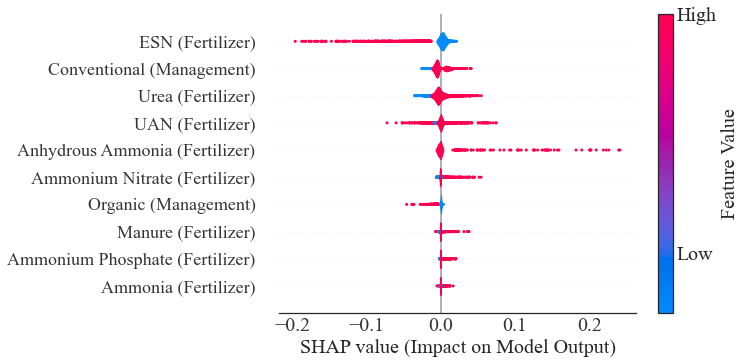

In [264]:
main_features = [38, 39, 40, 41, 43, 44, 45, 47, 65, 67]
feat_names = ['Ammonia (Fertilizer)', 'Ammonium Nitrate (Fertilizer)', 'Ammonium Phosphate (Fertilizer)', 'Anhydrous Ammonia (Fertilizer)', 
'ESN (Fertilizer)', 'Manure (Fertilizer)', 'UAN (Fertilizer)', 'Urea (Fertilizer)', 'Conventional (Management)', 'Organic (Management)']
shap.plots.violin(shap_values2[:,main_features,1],feature_names=feat_names, max_display=56,  show=False, color_bar=False,)
# Set tick label font
plt.rc('font', family='Times New Roman')
# Set x axis font size
plt.xticks(fontsize=20)
plt.xlabel(xlabel='SHAP value (Impact on Model Output)', fontsize=20)

# Set y axis font size
plt.yticks(fontsize=18)

# Set shap color bar font
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
##### Set cbar tick labels
cbar.ax.set_yticklabels(['','Low', '','','', 'High'])

# Set colorbar labels
cbar.ax.set_ylabel('Feature Value', fontsize=20)
# Set font to Times New Roman
plt.rc('font', family='Times New Roman')


plt.savefig('shap_violin_OHE.svg', bbox_inches = 'tight', pad_inches = 0.1, dpi = 800)

In [ ]:
# Set white background
plt.style.use('white')
shap.plots.bar(shap_values2[:,:,1], max_display=55, clustering_cutoff=0.1)
# save the figure

In [234]:
# Plot a 2 factor partial dependence plot of SandMean and VWC
shap_interaction_values = shap.TreeExplainer(xgb_classifier).shap_interaction_values(X.drop(['RawID', 'TreatmentID', 'ExperimentID', 'last_fert_type'], axis = 1))

In [239]:
interaction_matrix = np.abs(shap_interaction_values).sum(0)
for i in range(interaction_matrix.shape[0]):
    interaction_matrix[i, i] = 0
inds = np.argsort(-interaction_matrix.sum(0))[:12]
sorted_ia_matrix = interaction_matrix[inds, :][:, inds]
plt.figure(figsize=(12, 12))
plt.imshow(sorted_ia_matrix)
plt.yticks(
    range(sorted_ia_matrix.shape[0]),
    X.columns[inds],
    rotation=50.4,
    horizontalalignment="right",
)
plt.xticks(
    range(sorted_ia_matrix.shape[0]),
    X.columns[inds],
    rotation=50.4,
    horizontalalignment="left",
)
plt.gca().xaxis.tick_top()
plt.show()



In [216]:
# Load X and Y data
true_predictions = pd.read_csv("xgb_true_predictions.csv")
X = pd.read_csv("X_plus.csv")
# Connect to mysql database
cnx = mysql.connector.connect(user='root', password='Kh18riku!',
                                host='127.0.0.1',
                                database='global_n2o')
cursor = cnx.cursor()

query = ("SELECT * FROM RawClassificationTreatment")
# Execute the query and fetch all results
alldata = pd.read_sql(query, cnx)
cnx.close()
alldata = pd.merge(true_predictions, alldata[['RawID', 'N2OFlux', 'VWC', 'SoilT']], on='RawID')
alldata = pd.merge(alldata, X[['RawID', 'days_since_fert']], on='RawID')
print(alldata.head())

# Create for both VWC and Days Since Fertilization. Find the percent of hot moments in the intersection of each bin
vwc_bin_edges = np.arange(0.05, 0.56, 0.05)
vwc_bin_centers = vwc_bin_edges[:-1] + 0.05
fert_bin_edges = np.arange(0, 81, 10)
fert_bin_centers = fert_bin_edges[:-1] + 5
vwc_fert_df = pd.DataFrame(columns=['VWC', 'DaysSinceFert', 'HM_Percentage', 'n'])
for i in np.arange(len(vwc_bin_centers)):
    for j in np.arange(len(fert_bin_centers)):
        hm = len(alldata.query('VWC >= @vwc_bin_edges[@i] and VWC < @vwc_bin_edges[@i+1] and days_since_fert >= @fert_bin_edges[@j] and days_since_fert < @fert_bin_edges[@j+1] and Prediction == 1'))
        total = len(alldata.query('VWC >= @vwc_bin_edges[@i] and VWC < @vwc_bin_edges[@i+1] and days_since_fert >= @fert_bin_edges[@j] and days_since_fert < @fert_bin_edges[@j+1]'))
        if total == 0:
            vwc_fert_df = vwc_fert_df.append({'VWC': vwc_bin_centers[i], 'DaysSinceFert': fert_bin_centers[j], 'HM_Percentage': -0.1,
                                              'n': ' '}, ignore_index=True)
        else:
            vwc_fert_df = vwc_fert_df.append({'VWC': vwc_bin_centers[i], 'DaysSinceFert': fert_bin_centers[j], 'HM_Percentage': hm / total,
                                              'n': total}, ignore_index=True)

# Save df
vwc_fert_df.to_csv("vwc_fert_df.csv", index=False)

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


   RawID  HMTruth  Prediction  PredictionScore   N2OFlux    VWC   SoilT  \
0  42157      1.0           0         0.140097  11.73740  0.380   1.475   
1  42184      0.0           0         0.090835   2.04269  0.380   7.300   
2  42205      0.0           0         0.160468   1.44682  0.365  14.275   
3  42219      1.0           1         0.431552  39.91430  0.339  17.925   
4  42233      0.0           1         0.317898   6.14552  0.330  19.500   

   days_since_fert  
0            188.0  
1            215.0  
2             13.0  
3              9.0  
4             23.0  


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [217]:
# Load X and Y data
true_predictions = pd.read_csv("xgb_true_predictions.csv")
# Connect to mysql database
cnx = mysql.connector.connect(user='root', password='Kh18riku!',
                                host='127.0.0.1',
                                database='global_n2o')
cursor = cnx.cursor()

query = ("SELECT * FROM RawClassificationTreatment")
# Execute the query and fetch all results
alldata = pd.read_sql(query, cnx)
cnx.close()
alldata = pd.merge(true_predictions, alldata[['RawID', 'N2OFlux', 'VWC', 'SoilT']], on='RawID')
print(alldata.head())

# Create for both VWC and SoilT. Find the percent of hot moments in the intersection of each bin
vwc_bin_edges = np.arange(0.05, 0.56, 0.05)
vwc_bin_centers = vwc_bin_edges[:-1] + 0.05
soilT_bin_edges = np.arange(0, 31, 5)
soilT_bin_centers = soilT_bin_edges[:-1] + 2.5
vwc_soilT_df = pd.DataFrame(columns=['VWC', 'SoilT', 'HM_Percentage', 'n'])
print(np.arange(len(soilT_bin_centers) - 1))
for i in np.arange(len(vwc_bin_edges) - 1):
    for j in np.arange(len(soilT_bin_edges) - 1):
        hm = len(alldata.query('VWC >= @vwc_bin_edges[@i] and VWC < @vwc_bin_edges[@i+1] and SoilT >= @soilT_bin_edges[@j] and SoilT < @soilT_bin_edges[@j+1] and Prediction == 1'))
        total = len(alldata.query('VWC >= @vwc_bin_edges[@i] and VWC < @vwc_bin_edges[@i+1] and SoilT >= @soilT_bin_edges[@j] and SoilT < @soilT_bin_edges[@j+1]'))
        if total == 0:
            vwc_soilT_df = vwc_soilT_df.append({'VWC': vwc_bin_centers[i], 'SoilT': soilT_bin_centers[j], 'HM_Percentage': -0.1,
                                               'n': ' '}, ignore_index=True)
        else:
            vwc_soilT_df = vwc_soilT_df.append({'VWC': vwc_bin_centers[i], 'SoilT': soilT_bin_centers[j], 'HM_Percentage': hm / total,
                                               'n': total}, ignore_index=True)

# Save df
vwc_soilT_df.to_csv("vwc_soilT_df.csv", index=False)

# Load X and Y data
true_predictions = pd.read_csv("xgb_true_predictions.csv")


# Connect to mysql database
cnx = mysql.connector.connect(user='root', password='Kh18riku!',
                                host='127.0.0.1',
                                database='global_n2o')
cursor = cnx.cursor()

query = ("SELECT * FROM RawClassificationTreatment")
# Execute the query and fetch all results
alldata = pd.read_sql(query, cnx)
cnx.close()
alldata = pd.merge(true_predictions, alldata[['RawID', 'N2OFlux', 'VWC', 'SoilT']], on='RawID')
print(alldata.head())

# Create for both VWC and SoilT. Find the percent of hot moments in the intersection of each bin
vwc_bin_edges = np.arange(0.05, 0.56, 0.05)
vwc_bin_centers = vwc_bin_edges[:-1] + 0.05
soilT_bin_edges = np.arange(0, 31, 5)
soilT_bin_centers = soilT_bin_edges[:-1] + 2.5
vwc_soilT_df = pd.DataFrame(columns=['VWC', 'SoilT', 'HM_Percentage', 'n'])
print(np.arange(len(soilT_bin_centers) - 1))
for i in np.arange(len(vwc_bin_edges) - 1):
    for j in np.arange(len(soilT_bin_edges) - 1):
        hm = len(alldata.query('VWC >= @vwc_bin_edges[@i] and VWC < @vwc_bin_edges[@i+1] and SoilT >= @soilT_bin_edges[@j] and SoilT < @soilT_bin_edges[@j+1] and Prediction == 1'))
        total = len(alldata.query('VWC >= @vwc_bin_edges[@i] and VWC < @vwc_bin_edges[@i+1] and SoilT >= @soilT_bin_edges[@j] and SoilT < @soilT_bin_edges[@j+1]'))
        if total == 0:
            vwc_soilT_df = vwc_soilT_df.append({'VWC': vwc_bin_centers[i], 'SoilT': soilT_bin_centers[j], 'HM_Percentage': -0.1,
                                               'n': ' '}, ignore_index=True)
        else:
            vwc_soilT_df = vwc_soilT_df.append({'VWC': vwc_bin_centers[i], 'SoilT': soilT_bin_centers[j], 'HM_Percentage': hm / total,
                                               'n': total}, ignore_index=True)

# Save df
vwc_soilT_df.to_csv("vwc_soilT_df.csv", index=False)# Load X and Y data


pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


   RawID  HMTruth  Prediction  PredictionScore   N2OFlux    VWC   SoilT
0  42157      1.0           0         0.140097  11.73740  0.380   1.475
1  42184      0.0           0         0.090835   2.04269  0.380   7.300
2  42205      0.0           0         0.160468   1.44682  0.365  14.275
3  42219      1.0           1         0.431552  39.91430  0.339  17.925
4  42233      0.0           1         0.317898   6.14552  0.330  19.500
[0 1 2 3 4]


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

   RawID  HMTruth  Prediction  PredictionScore   N2OFlux    VWC   SoilT
0  42157      1.0           0         0.140097  11.73740  0.380   1.475
1  42184      0.0           0         0.090835   2.04269  0.380   7.300
2  42205      0.0           0         0.160468   1.44682  0.365  14.275
3  42219      1.0           1         0.431552  39.91430  0.339  17.925
4  42233      0.0           1         0.317898   6.14552  0.330  19.500
[0 1 2 3 4]


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [218]:
# Load X
X = pd.read_csv("X_plus.csv")
# Load true predictions
true_predictions = pd.read_csv("xgb_true_predictions.csv")
# Merge X with predictions
alldata = pd.merge(true_predictions, X, on='RawID')
# Drop rows where Prediction is null
alldata = alldata.dropna(subset=['Prediction'])
# Rename 'Ammonia'  to 'Anhydrous Ammonia'
alldata['last_fert_type'] = alldata['last_fert_type'].replace('Ammonia', 'Anhydrous Ammonia')

# Create bins for days since fert
days_since_fert_bin_edges = np.arange(0, 81, 10)
days_since_fert_bin_centers = days_since_fert_bin_edges[:-1] + 5
fert_model_df = pd.DataFrame(columns=['DaysSinceFert', 'FertType' , 'HM_Percentage', 'n'])

# For each unique value in LastFertType whith value count above 1000, iterate through each bin of days since fert and calculate the HM_Percentage
# Rename 'Ammonia' and 'Ammonium Phosphate' to 'Ammonium'
f_types = alldata['last_fert_type'].value_counts()
print(f_types)

f_types = f_types.index
for f_type in f_types:
    for i in np.arange(len(days_since_fert_bin_edges) - 1):
        hm = len(alldata.query('last_fert_type == @f_type and days_since_fert >= @days_since_fert_bin_edges[@i] and days_since_fert < @days_since_fert_bin_edges[@i+1] and Prediction == 1'))
        total = len(alldata.query('last_fert_type == @f_type and days_since_fert >= @days_since_fert_bin_edges[@i] and days_since_fert < @days_since_fert_bin_edges[@i+1]'))
        if total == 0:
            fert_model_df = fert_model_df.append({'DaysSinceFert': days_since_fert_bin_centers[i], 'FertType': f_type, 'HM_Percentage': -0.1,
                                                  'n': ' '}, ignore_index=True)
        else:
            fert_model_df = fert_model_df.append({'DaysSinceFert': days_since_fert_bin_centers[i], 'FertType': f_type, 'HM_Percentage': hm / total,
                                                  'n': total}, ignore_index=True)

# Save df
fert_model_df.to_csv("fert_model_df.csv", index=False)

Urea                  2214
UAN                   1119
ESN                    950
Unknown                833
Manure                 437
Anhydrous Ammonia      328
Ammonium Nitrate       295
Ammonium Phosphate     250
Cover Crop              31
Name: last_fert_type, dtype: int64


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [221]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Load df
vwc_fert_df = pd.read_csv("vwc_fert_df.csv")
vwc_fert_df['HM_Percentage'] = vwc_fert_df['HM_Percentage'].astype(float) * 100
vwc_soilT_df = pd.read_csv("vwc_soilT_df.csv")

fert_model_df = pd.read_csv("fert_model_df.csv")
# Drop unknown fert types
fert_model_df = fert_model_df.query('FertType != "Unknown"')
fert_model_df = fert_model_df.query('FertType != "Unknown"')

# Order a list of fert type by the overall average HM_Percentage
fert_types = fert_model_df['FertType'].unique()
fert_type_avg = []
for f_type in fert_types:
    avg = statistics.mean(fert_model_df.query('FertType == @f_type')['HM_Percentage'])
    fert_type_avg.append(avg)
fert_type_avg, fert_types = zip(*sorted(zip(fert_type_avg, fert_types)))
fert_types = list(fert_types)

vwc_soilT_df['HM_Percentage'] = vwc_soilT_df['HM_Percentage'].astype(float) * 100
fert_model_df['HM_Percentage'] = fert_model_df['HM_Percentage'].astype(float) * 100

# Create a 2 by 2 grid of subplots
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.03, horizontal_spacing=0.01)

# Create a heatmap of HM_Percentage vs VWC and DaysSinceFert in the top left subplot
p1 = go.Heatmap(x=vwc_fert_df['VWC'], y=vwc_fert_df['DaysSinceFert'], z=vwc_fert_df['HM_Percentage'], zmin=-10, zmax=100, colorscale=[
    'rgb(255, 255, 255)', 'rgb(0, 0, 150)', 'rgb(25, 0, 200)', 'rgb(50, 0, 250)', 'rgb(75, 0, 200)', 'rgb(100, 0, 150)',
    'rgb(125, 0, 125)', 'rgb(170, 0, 100)', 'rgb(225, 0, 50)', 'rgb(255, 0, 0)', 'rgb(225, 0, 0)', 'rgb(150, 0, 0)'], colorbar={'title': 'Predicted<br>Probability of<br>Hot Moment (%)'}, text=vwc_fert_df['n'], textfont=dict(size=10), texttemplate="%{text}")

fig.append_trace(p1,1,1)
fig.update_layout(width=800, height=800)

# Label axis
fig.update_xaxes(title_text='Volumetric Water Content', row=2, col=1)
fig.update_xaxes(title_text='', row=1, col=1)

fig.update_yaxes(title_text='Days Since Fertilization', row=1, col=1)
fig.update_yaxes(title_text='Soil Temperature (°C)', row=2, col=1)

# Update font
fig.update_layout(font=dict(
        family="Arial",
        size=20,
        color="Black"
    ))
# Y axis labels in increments of 10
fig.update_yaxes(tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, ], ticktext=['0', '10', '20', '30', '40', '50', '60', '70', '80',])
# Reverse order of y axis
#fig.update_yaxes(autorange="reversed", row=1, col=1)

# Convert x axis labels to percent
fig.update_xaxes(tickvals=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, ], ticktext=['5%', '5-10%', '10-15%', '15-20%', '20-25%',
                                                                                                  '25-30%', '30-35%', '35-40%', '40-45%', '45-50%',
                                                                                                  '50-55%'], tickangle=90, row=2, col=1)
fig.update_xaxes(tickvals=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, ], ticktext=['', '', '', '', '',
                                                                                                  '', '', '', '', '',
                                                                                                  ''], row=1, col=1)
p2 = go.Heatmap(x=vwc_soilT_df['VWC'], y=vwc_soilT_df['SoilT'], z=vwc_soilT_df['HM_Percentage'], zmin=-10, zmax=100, colorscale=[
    'rgb(255, 255, 255)', 'rgb(0, 0, 150)', 'rgb(25, 0, 200)', 'rgb(50, 0, 250)', 'rgb(75, 0, 200)', 'rgb(100, 0, 150)',
    'rgb(125, 0, 125)', 'rgb(170, 0, 100)', 'rgb(225, 0, 50)', 'rgb(255, 0, 0)', 'rgb(225, 0, 0)', 'rgb(150, 0, 0)'], colorbar={'title': 'Predicted<br>Probability of<br>Hot Moment (%)'}, text=vwc_soilT_df['n'], textfont=dict(size=10), texttemplate="%{text}")

fig.append_trace(p2,2,1)
fig.update_yaxes(tickvals=[0, 5, 10, 15, 20, 25, 30,], ticktext=['0', '5', '10', '15', '20', '25', '30'], row=2, col=1)

# Create a heatmap of HM_Percentage vs DaysSinceFert and FertType
p3 = go.Heatmap(y=fert_model_df['DaysSinceFert'], x=fert_model_df['FertType'], z=fert_model_df['HM_Percentage'], zmin=-10, zmax=100, colorscale=[
    'rgb(255, 255, 255)', 'rgb(0, 0, 150)', 'rgb(25, 0, 200)', 'rgb(50, 0, 250)', 'rgb(75, 0, 200)', 'rgb(100, 0, 150)',
    'rgb(125, 0, 125)', 'rgb(170, 0, 100)', 'rgb(225, 0, 50)', 'rgb(255, 0, 0)', 'rgb(225, 0, 0)', 'rgb(150, 0, 0)'], colorbar={'title': 'Predicted<br>Probability of<br>Hot Moment (%)'}, text=fert_model_df['n'], textfont=dict(size=10), texttemplate="%{text}")

fig.update_yaxes(tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, ], ticktext=['', '', '', '', '',
                                                                                                  '', '', '', '', '',
                                                                                                  ''], row=1, col=2)
# Set x lim
fig.update_xaxes(range=[0.075, .525], row=1, col=1)
fig.update_xaxes(range=[0.075, .525], row=2, col=1)

fig.append_trace(p3,1,2)
#fig.update_yaxes(autorange="reversed", row=1, col=2)
fig.update_xaxes(tickangle=90, row=1, col=2)


# Set padding
fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
# Set font
fig.update_layout(font=dict(
        family="Times New Roman",
        size=20,
        color="Black"
    ))

fig.write_image("vwc_fert_heatmap.svg", format='svg')

fig.show()



KeyboardInterrupt: 